In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from scipy.integrate import nquad
%matplotlib inline

In [2]:
nquad(lambda x,y:1+(np.sin(x)+np.cos(y))/np.exp(y),[[-1,1],[-1,1]])

(7.866842992401425, 8.733950221275128e-14)

In [30]:
def printer(name):
    base=np.genfromtxt(name+"(base-level5).txt",delimiter=',')
    ee=np.genfromtxt(name+"(e-level5).txt",delimiter=',')
    #ee=ee[(ee[:,0]<=1)&(ee[:,1]<=1)]
    ef=np.genfromtxt(name+"(f-level5).txt",delimiter=',')
    eg=np.genfromtxt(name+"(g-level5).txt",delimiter=',')
    baserows=base.view([('',base.dtype)]*base.shape[1])
    eerows=ee.view([('',ee.dtype)]*ee.shape[1])
    efrows=ef.view([('',ef.dtype)]*ef.shape[1])
    egrows=eg.view([('',eg.dtype)]*eg.shape[1])
    eedif=np.setdiff1d(eerows,baserows).view(ee.dtype).reshape(-1,ee.shape[1])
    efdif=np.setdiff1d(efrows,baserows).view(ef.dtype).reshape(-1,ef.shape[1])
    egdif=np.setdiff1d(egrows,baserows).view(eg.dtype).reshape(-1,eg.shape[1])
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(eedif[:,0],eedif[:,1],".r")
    plt.title(name +" (e)")
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(efdif[:,0],efdif[:,1],".r")
    plt.title(name +" (f)")
    plt.figure(figsize=(5,5),dpi=300)
    plt.plot(base[:,0],base[:,1],".b")
    plt.plot(egdif[:,0],egdif[:,1],".r")
    plt.title(name +" (g)")
    df=pd.read_csv(name+".txt",header=None)
    display(df)
    ye=nquad(lambda x,y: (x**3-y**2),[[-1,1],[-1,1]])
    ye2=nquad(lambda x,y:1+(np.sin(x)+np.cos(y))/np.exp(y),[[-1,1],[-1,1]])
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log',nonposy='clip')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[2]-4),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[1]-ye[0]),label='x^3-x^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[3]-ye2[0]),label='1+(sin(x)+cos(x))/e^x')
    plt.legend()
    plt.title(name + " Integrationsfehler")
    plt.savefig(name+"_integrationsfehler.png")
    plt.show()
    plt.figure(figsize=(7,5),dpi=200)
    plt.gca().set_yscale('log')
    plt.xlabel('points')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[5]),label='1.0')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[4]),label='x^3-x^2')
    plt.plot(df.loc[0],np.finfo(float).eps+abs(df.loc[6]),label='1+(sin(x)+cos(x))/e^x')
    plt.legend()
    plt.title(name + " Approximationsfehler")

    plt.savefig(name+"_approximationsfehler.png")
    plt.show()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000e+01,2.000000e+01,4.000000e+01,8.000000e+01,1.600000e+02,3.200000e+02,6.400000e+02,1.280000e+03,2.560000e+03,5.120000e+03,1.024000e+04,2.048000e+04,4.096000e+04,8.192000e+04,NaN
1,-1.500000e+00,-1.500000e+00,-1.375000e+00,-1.345581e+00,-1.336189e+00,-1.333949e+00,-1.333496e+00,-1.333374e+00,-1.333344e+00,-1.333336e+00,-1.333334e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,NaN
2,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,NaN
3,7.812900e+00,7.812900e+00,7.853104e+00,7.863393e+00,7.867000e+00,7.866895e+00,7.866864e+00,7.866849e+00,7.866844e+00,7.866843e+00,7.866843e+00,7.866843e+00,7.866843e+00,7.866843e+00,NaN
4,5.179232e-07,1.033214e-06,1.188424e-07,1.389486e-08,2.509841e-09,3.185082e-10,4.080060e-11,5.575500e-12,7.292000e-13,8.630000e-14,1.140000e-14,1.400000e-15,2.000000e-16,0.000000e+00,NaN
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
6,3.443016e-07,3.856645e-07,3.800299e-08,1.115968e-08,2.154772e-09,5.223602e-10,9.400460e-11,2.137850e-11,4.432500e-12,8.190000e-13,1.527000e-13,2.800000e-14,5.200000e-15,9.000000e-16,NaN


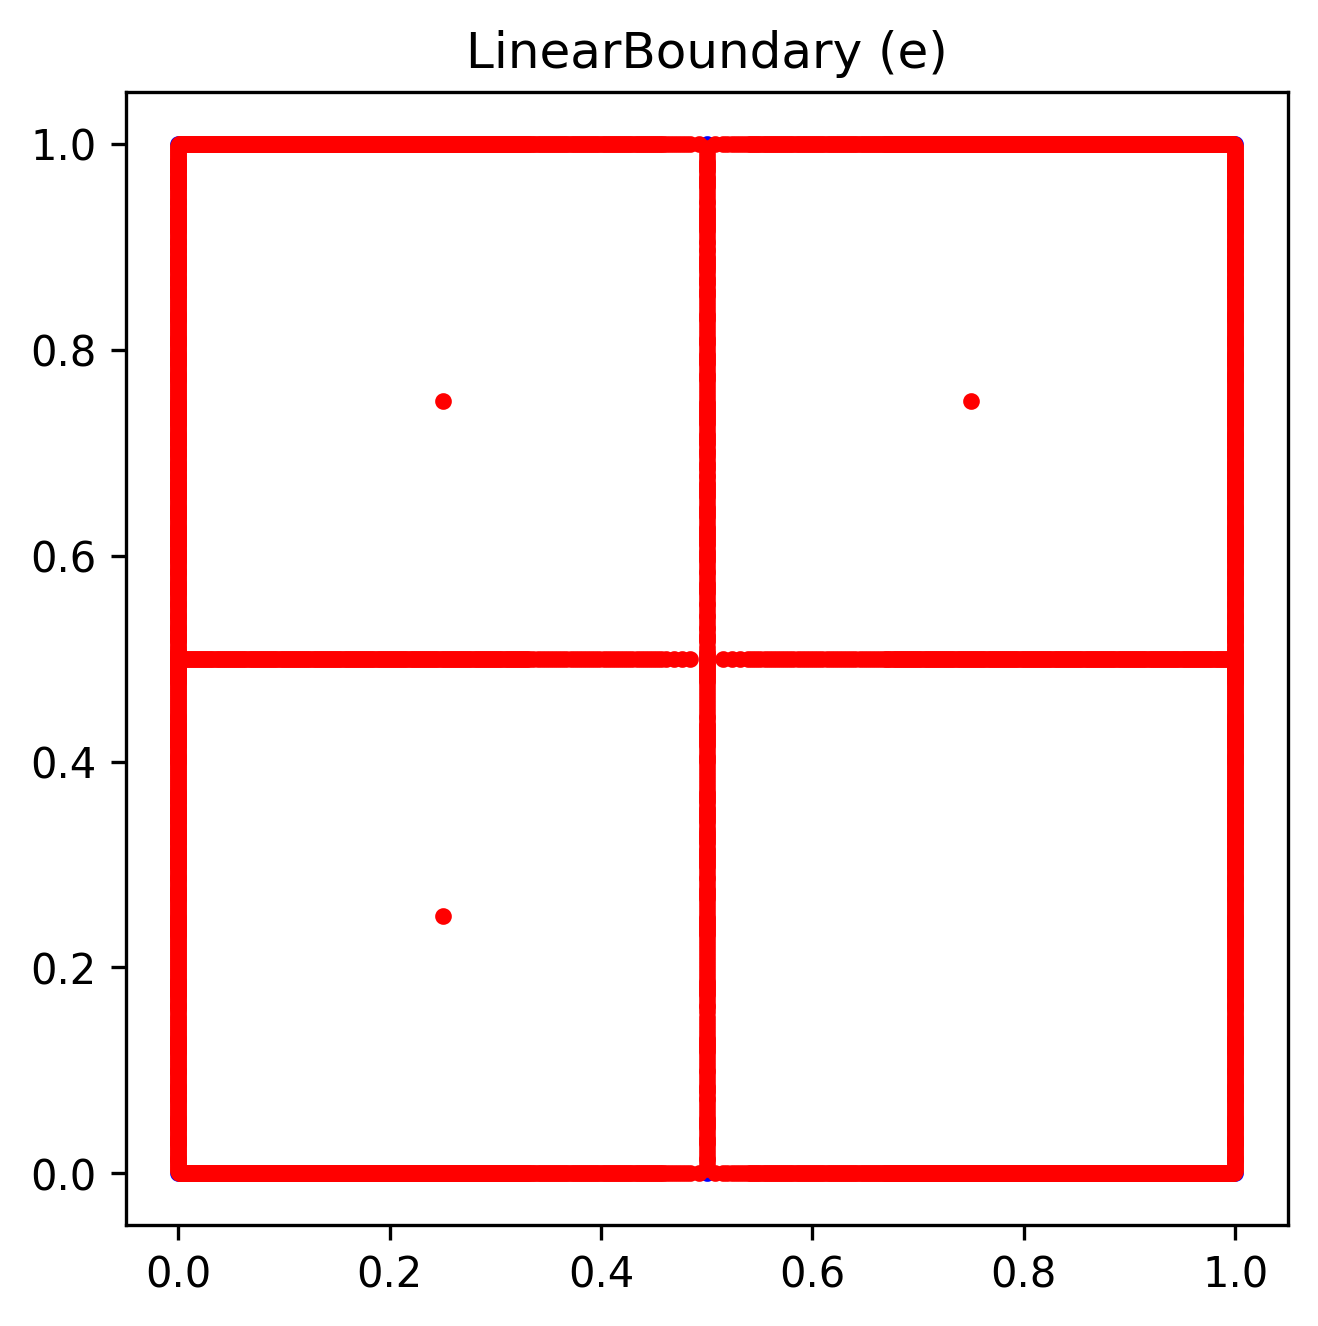

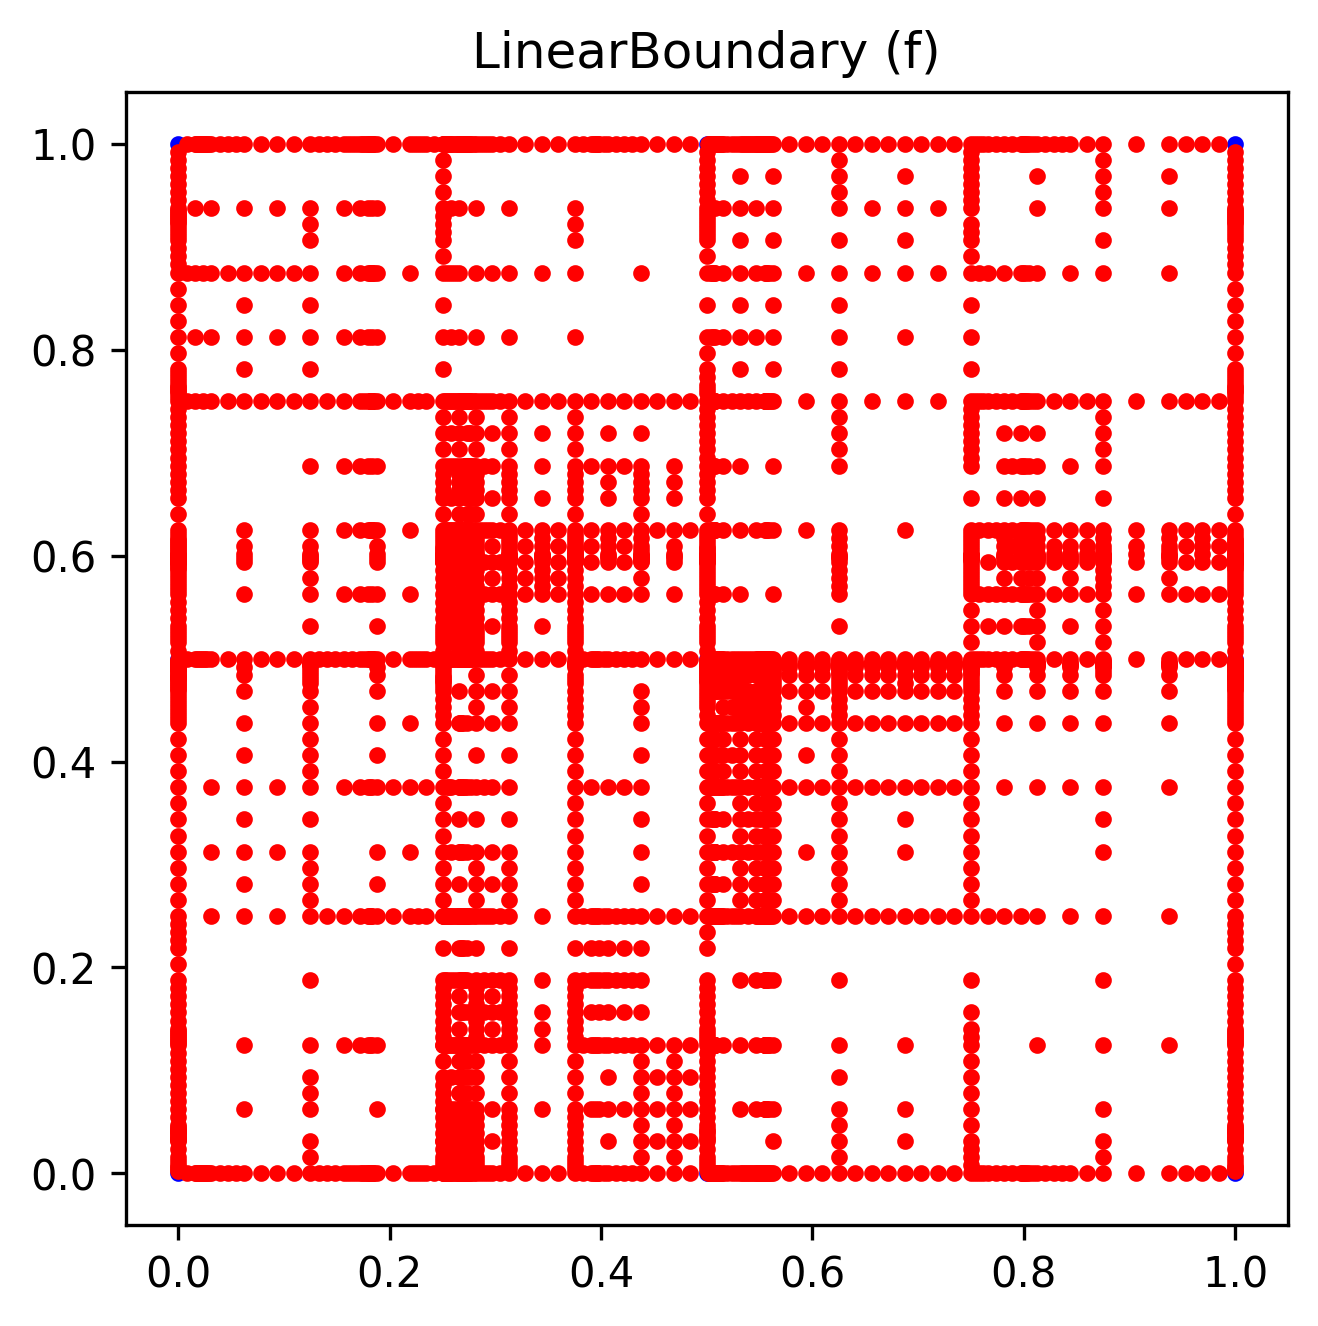

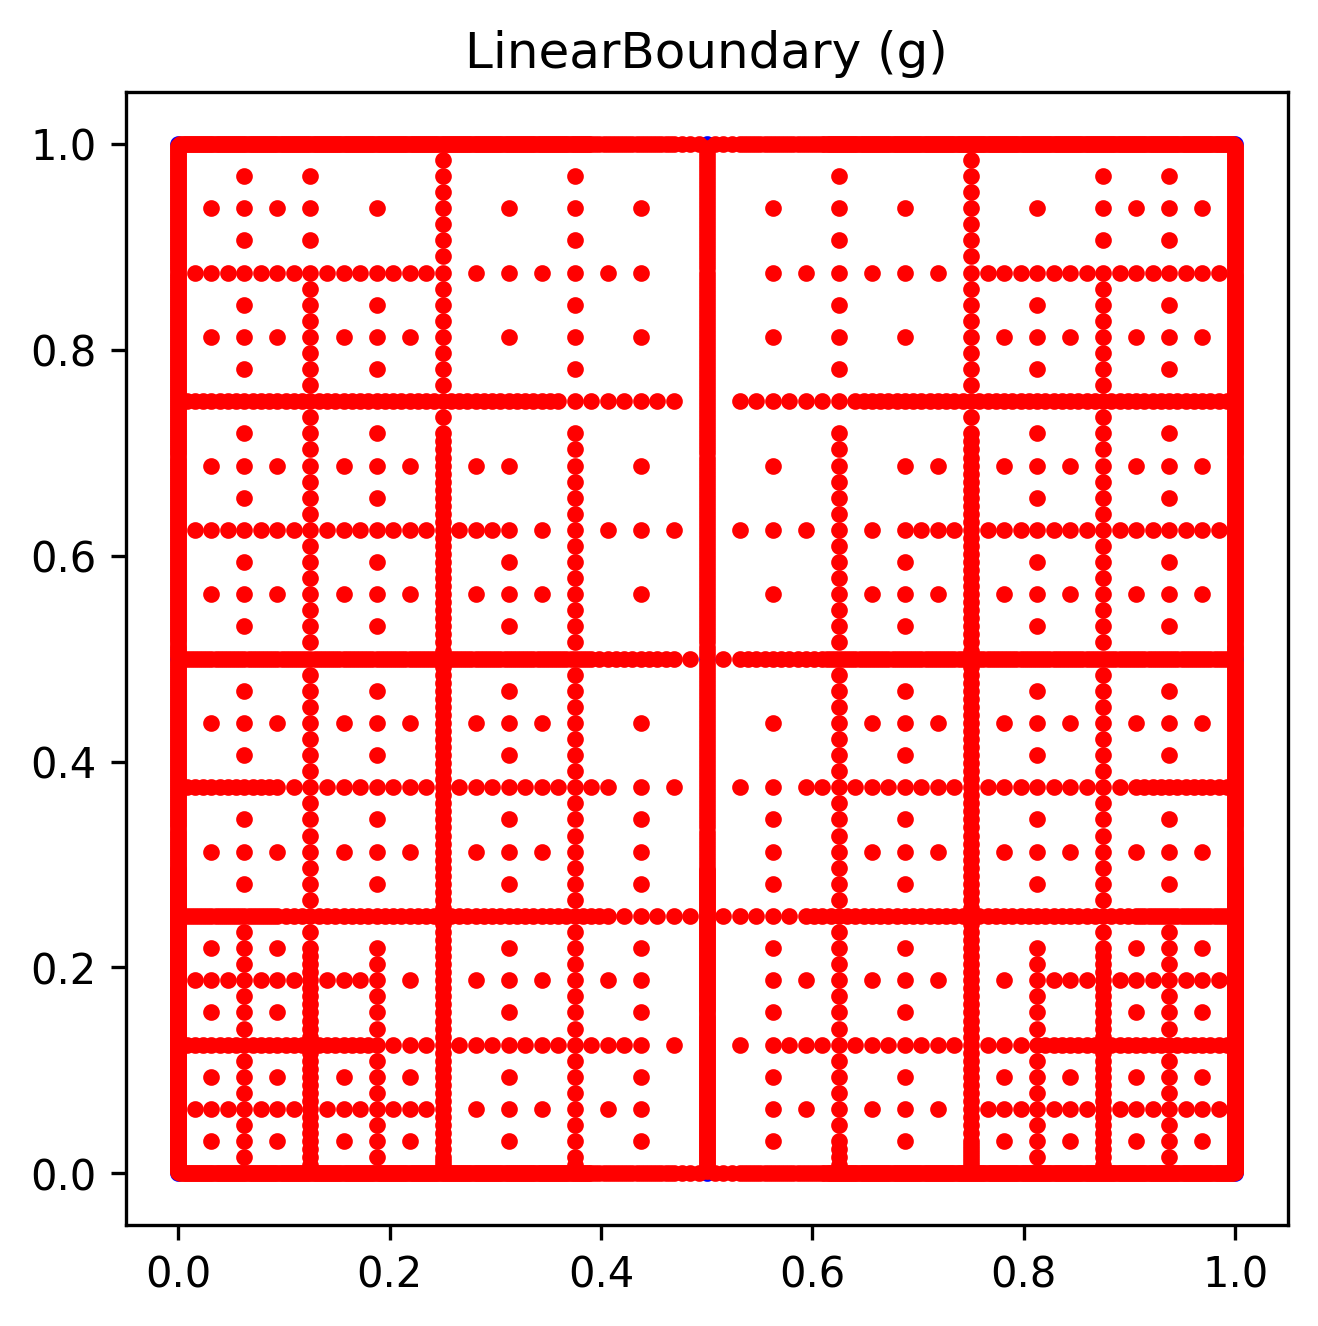

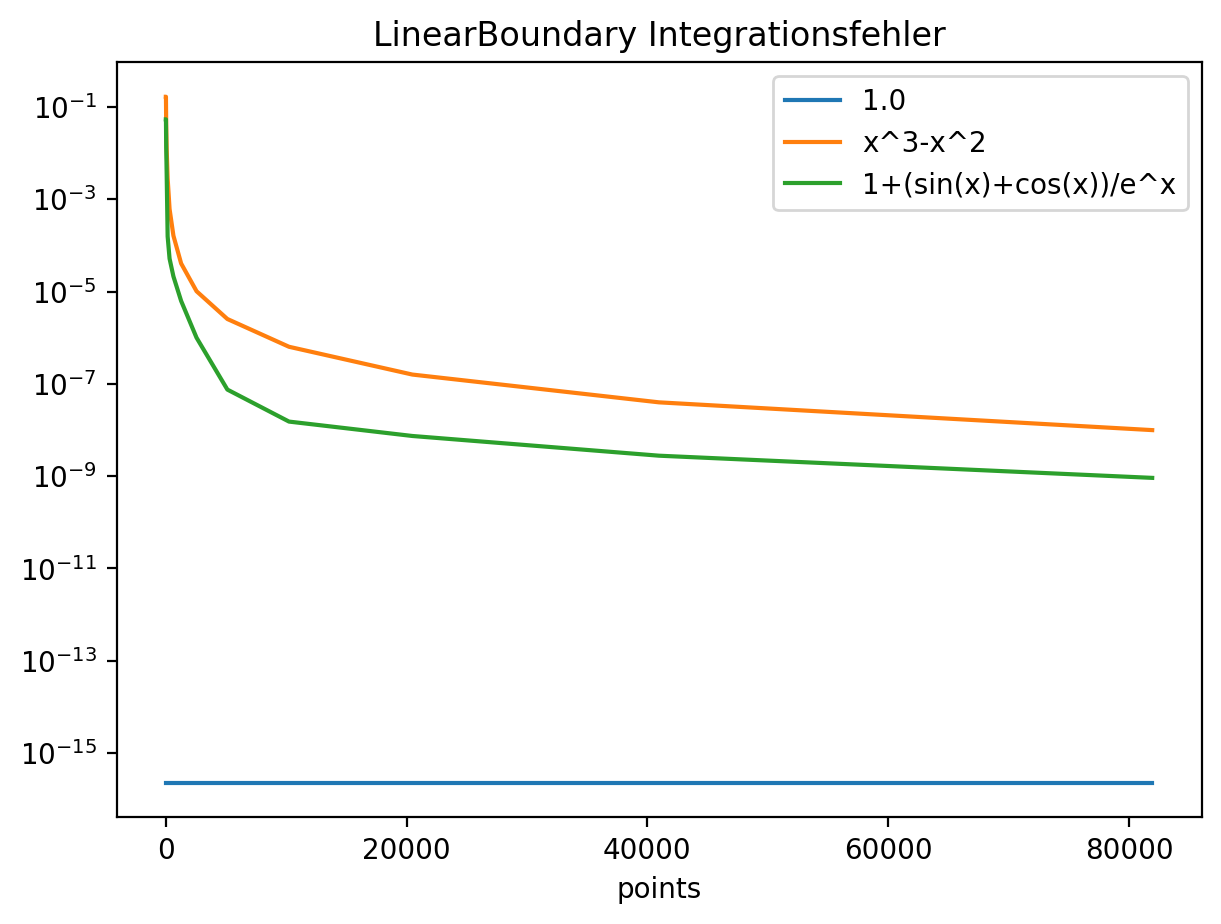

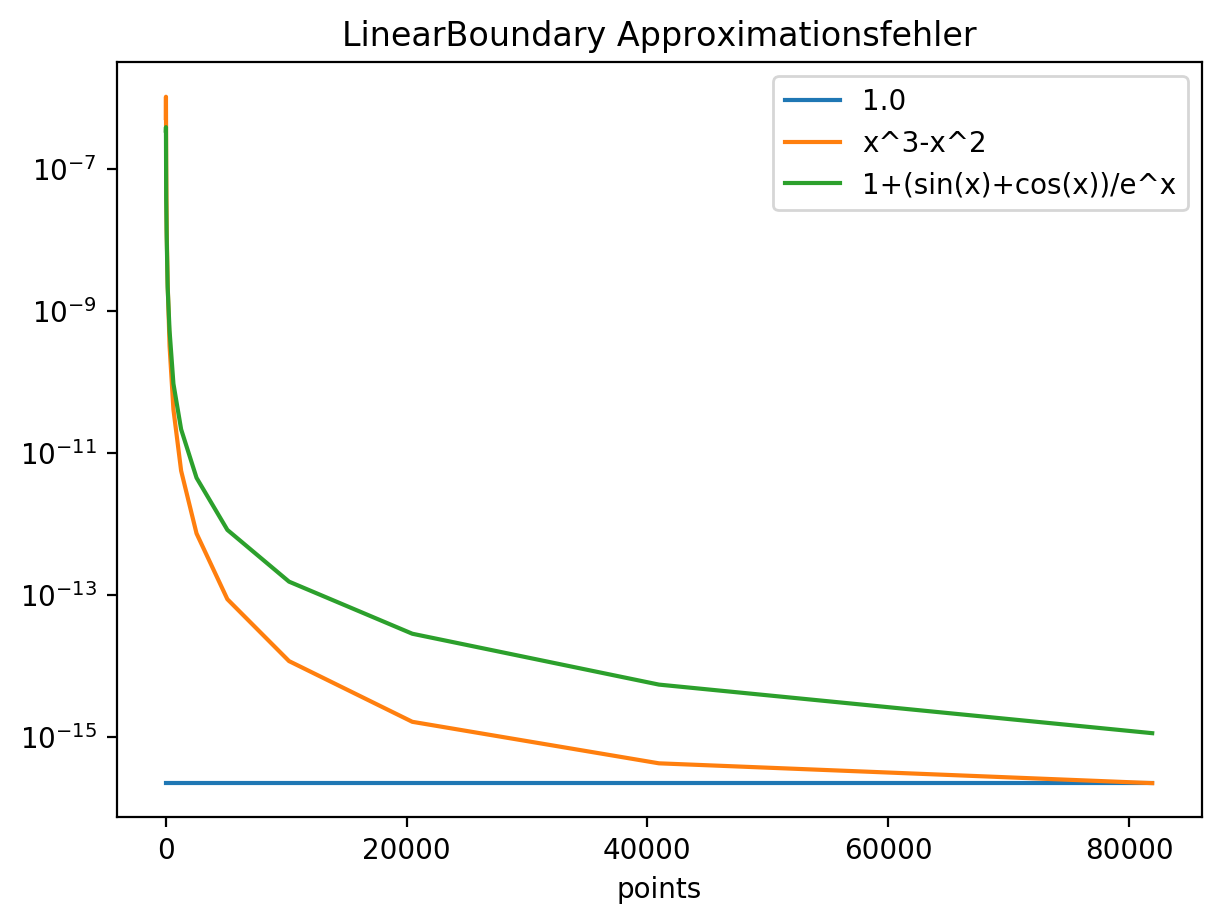

In [31]:
printer("LinearBoundary")

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000e+01,2.000000e+01,4.000000e+01,8.000000e+01,1.600000e+02,3.200000e+02,640.000000,1280.000000,2560.000000,5120,10240,NaN
1,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333,-1.333333,-1.333333,353313147248370164682356424704.0000000000000000,373554630270852823649102069760.0000000000000000,NaN
2,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.0000000000000000,4.0000000000000000,NaN
3,7.861380e+00,7.861380e+00,7.866506e+00,7.866836e+00,7.866842e+00,7.866843e+00,7.866843,7.866843,7.866843,7.8668429923871415,7.8668429924003869,NaN
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0403185203501333,0.0862605068367788,NaN
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0000000000000000,0.0000000000000000,NaN
6,1.512309e-08,1.729524e-08,2.067857e-10,8.569000e-13,5.060000e-14,1.300000e-15,0.000000,0.000000,0.000000,0.0000000000000000,0.0000000000000000,NaN


TypeError: unsupported operand type(s) for -: 'str' and 'int'

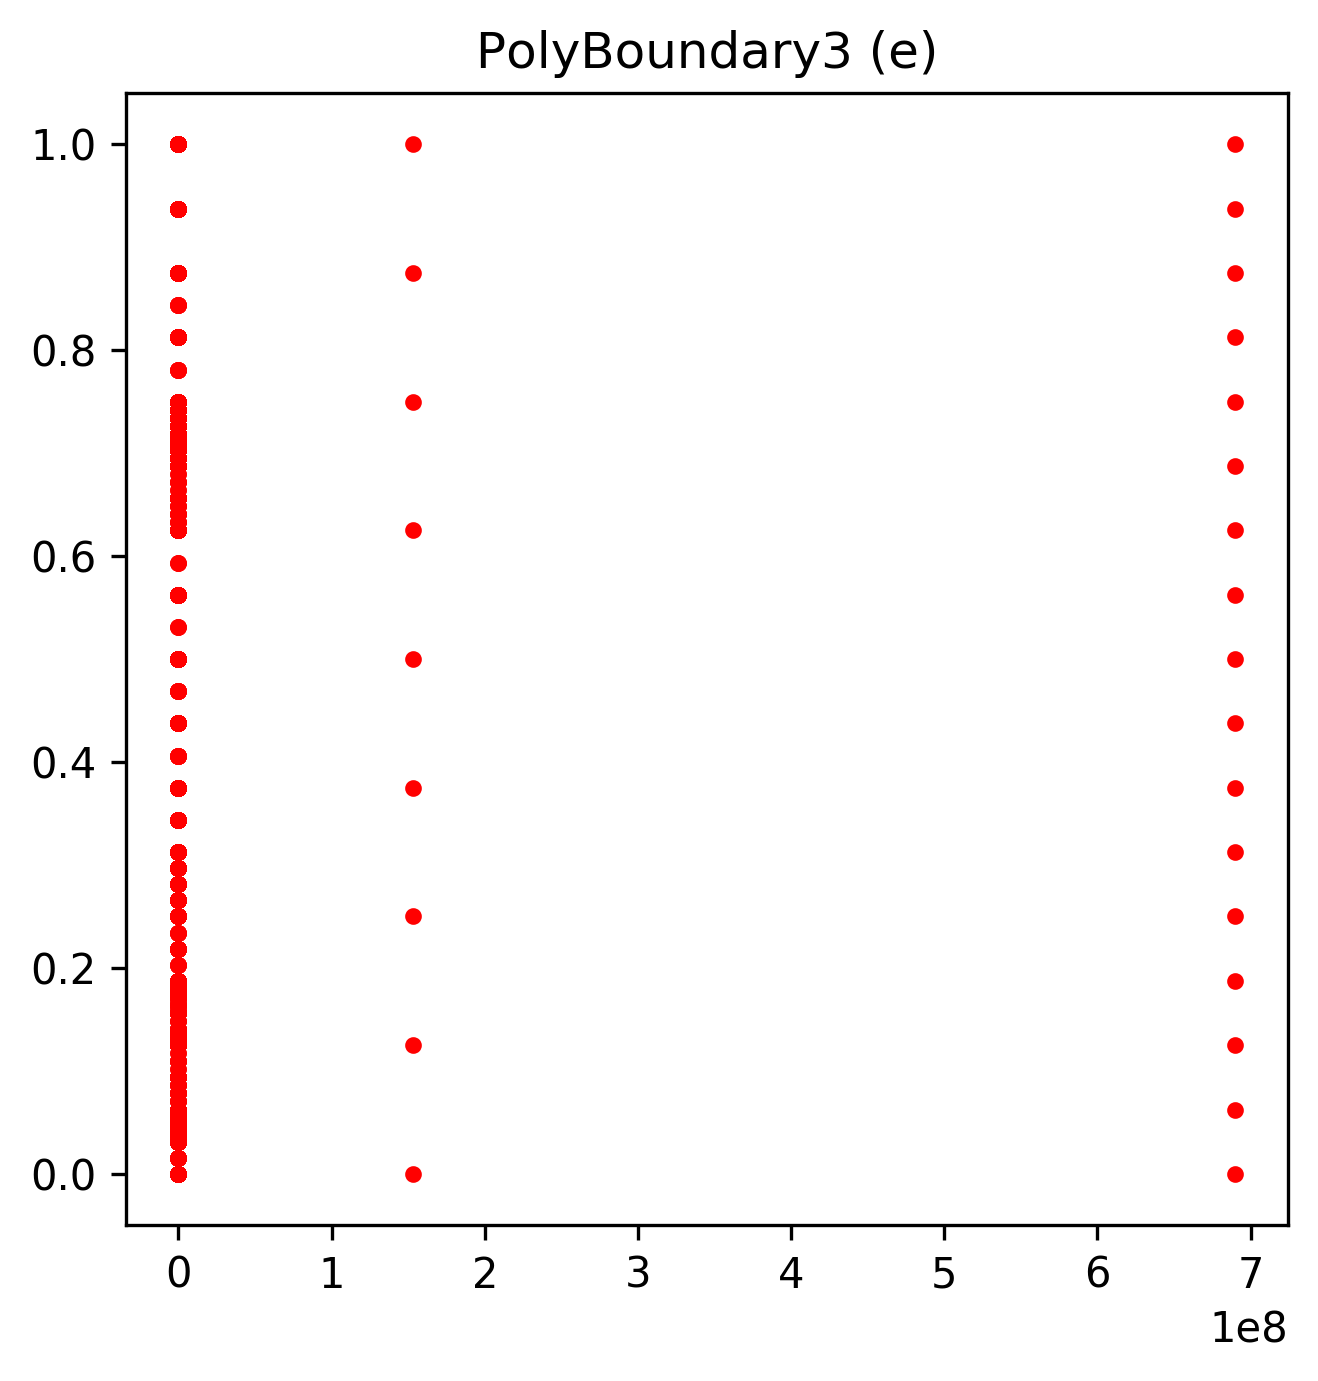

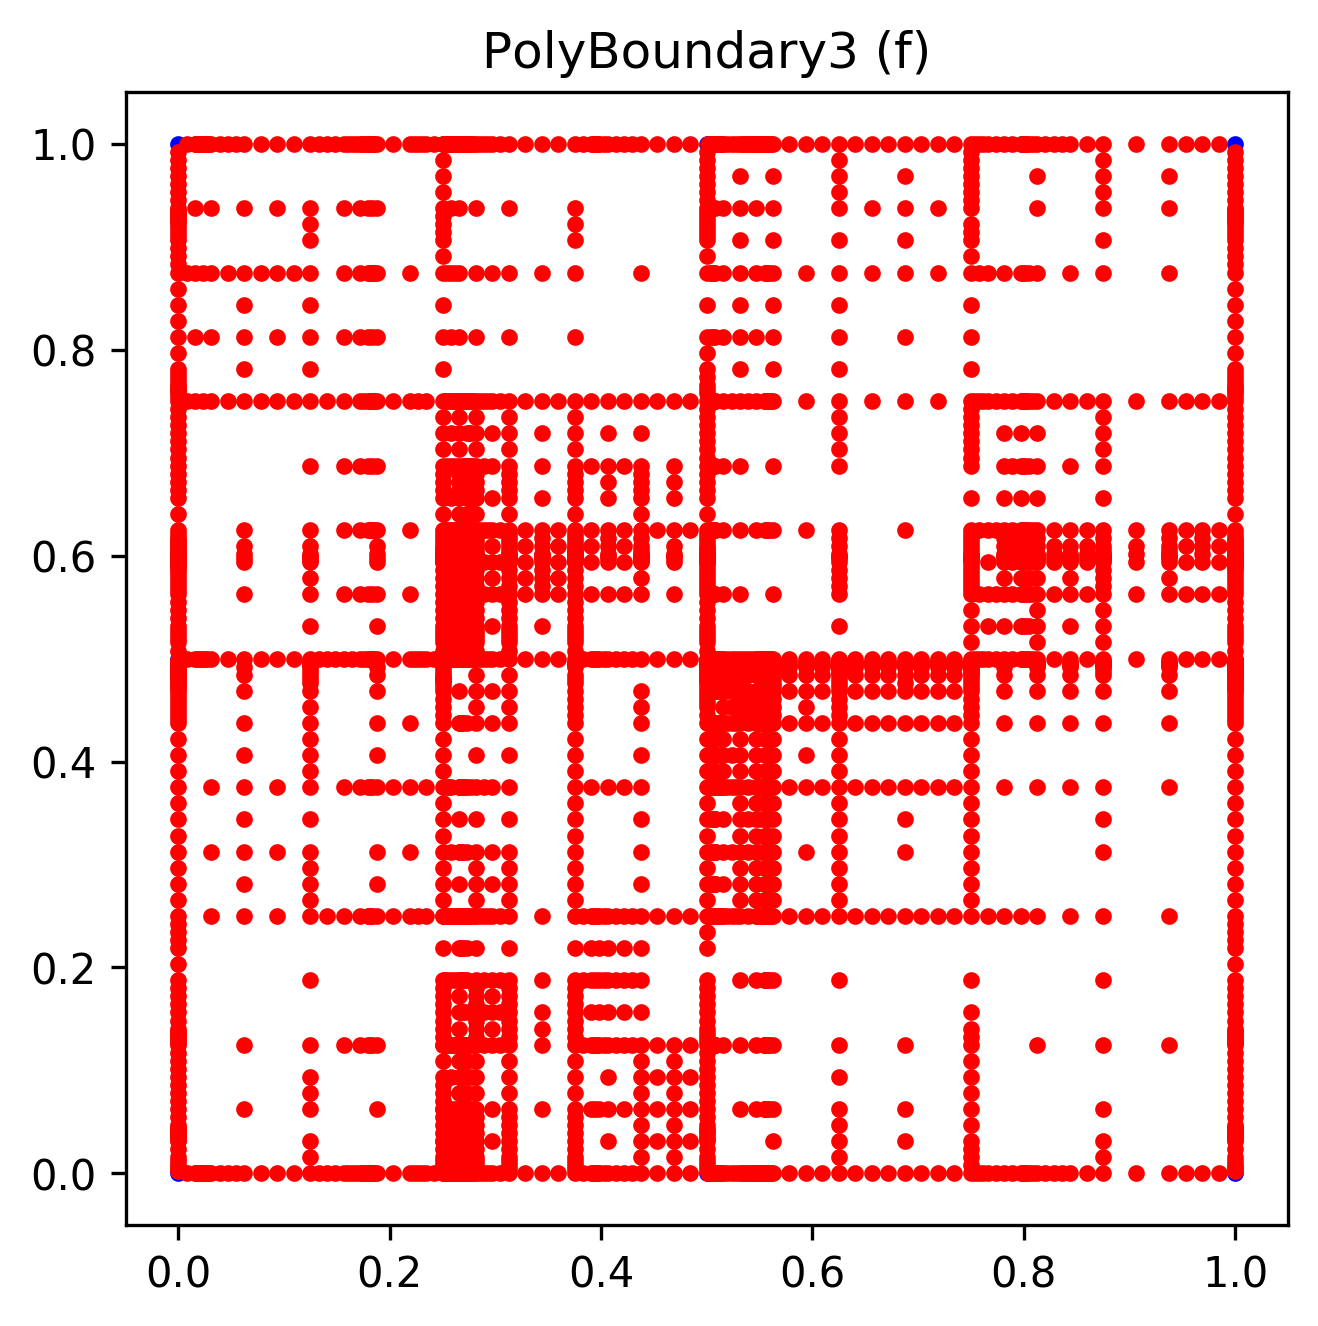

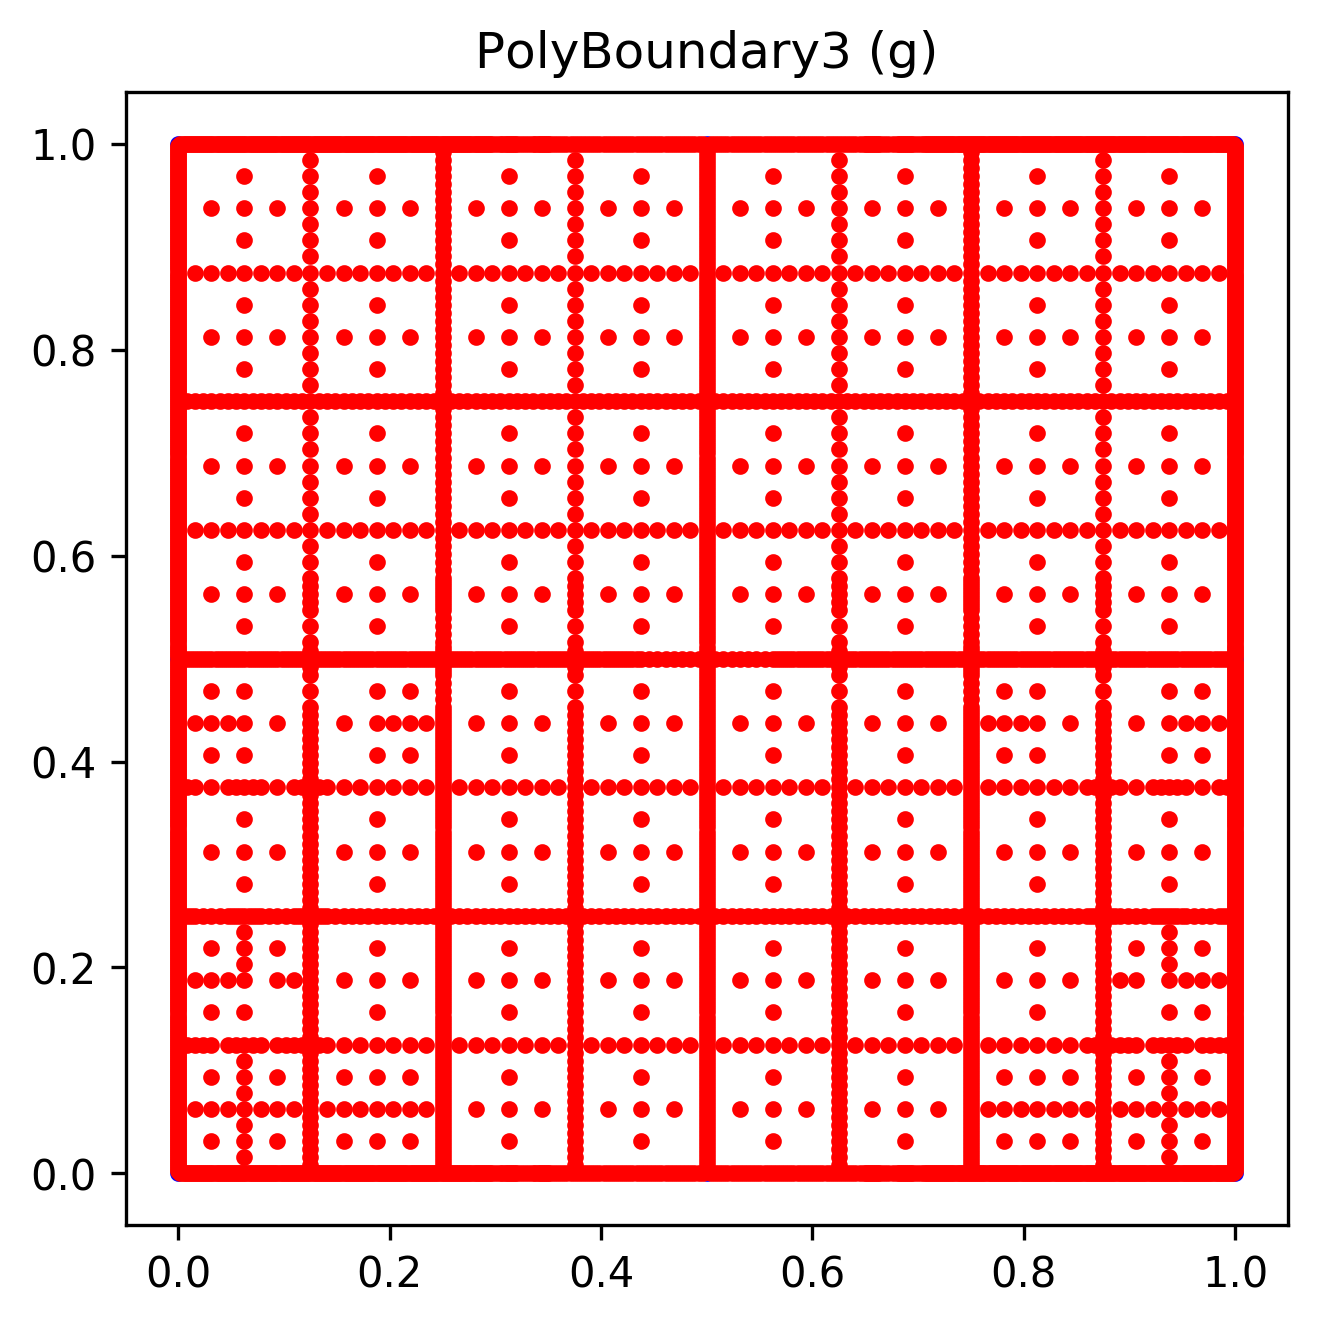

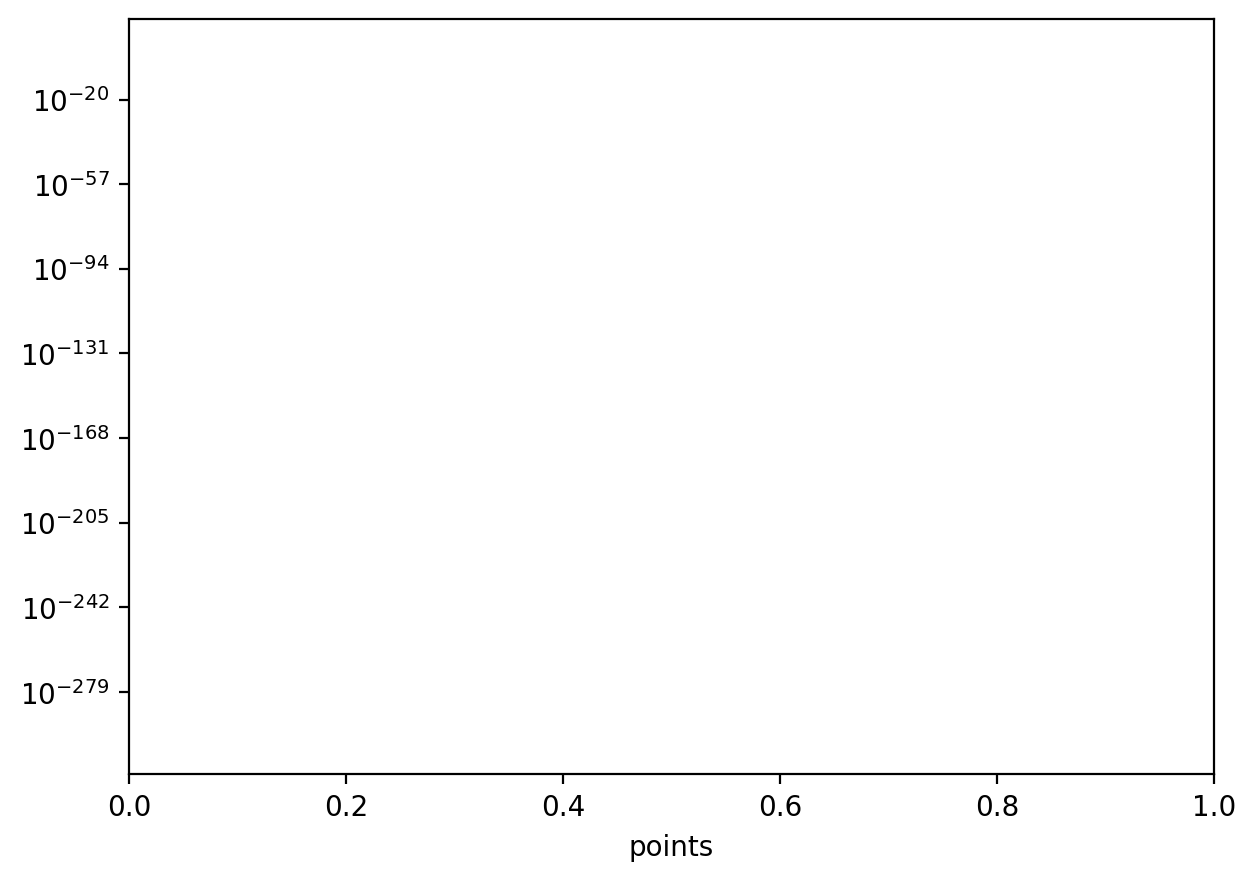

In [27]:
printer('PolyBoundary3')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.000000,4.000000,8.000000,1.600000e+01,3.200000e+01,6.400000e+01,1.280000e+02,2.560000e+02,5.120000e+02,1.024000e+03,2.048000e+03,4.096000e+03,8192.000000,NaN
1,0.000000,0.000000,0.000000,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333,NaN
2,0.000000,0.000000,0.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,NaN
3,0.000000,0.000000,0.000000,7.865104e+00,7.866732e+00,7.866838e+00,7.866843e+00,7.866843e+00,7.866843e+00,7.866843e+00,7.866843e+00,7.866843e+00,7.866843,NaN
4,0.000012,0.000004,0.000017,1.212638e-05,6.006014e-09,9.584338e-11,2.974823e-12,1.012621e-13,2.706300e-15,7.190000e-17,2.400000e-18,1.000000e-19,0.000000,NaN
5,0.000020,0.000040,0.000080,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN
6,0.000105,0.000132,0.000209,6.461186e-07,8.024777e-07,2.406861e-06,3.752708e-06,7.917162e-06,1.789808e-05,3.599609e-05,6.820423e-05,1.383721e-04,0.000284,NaN


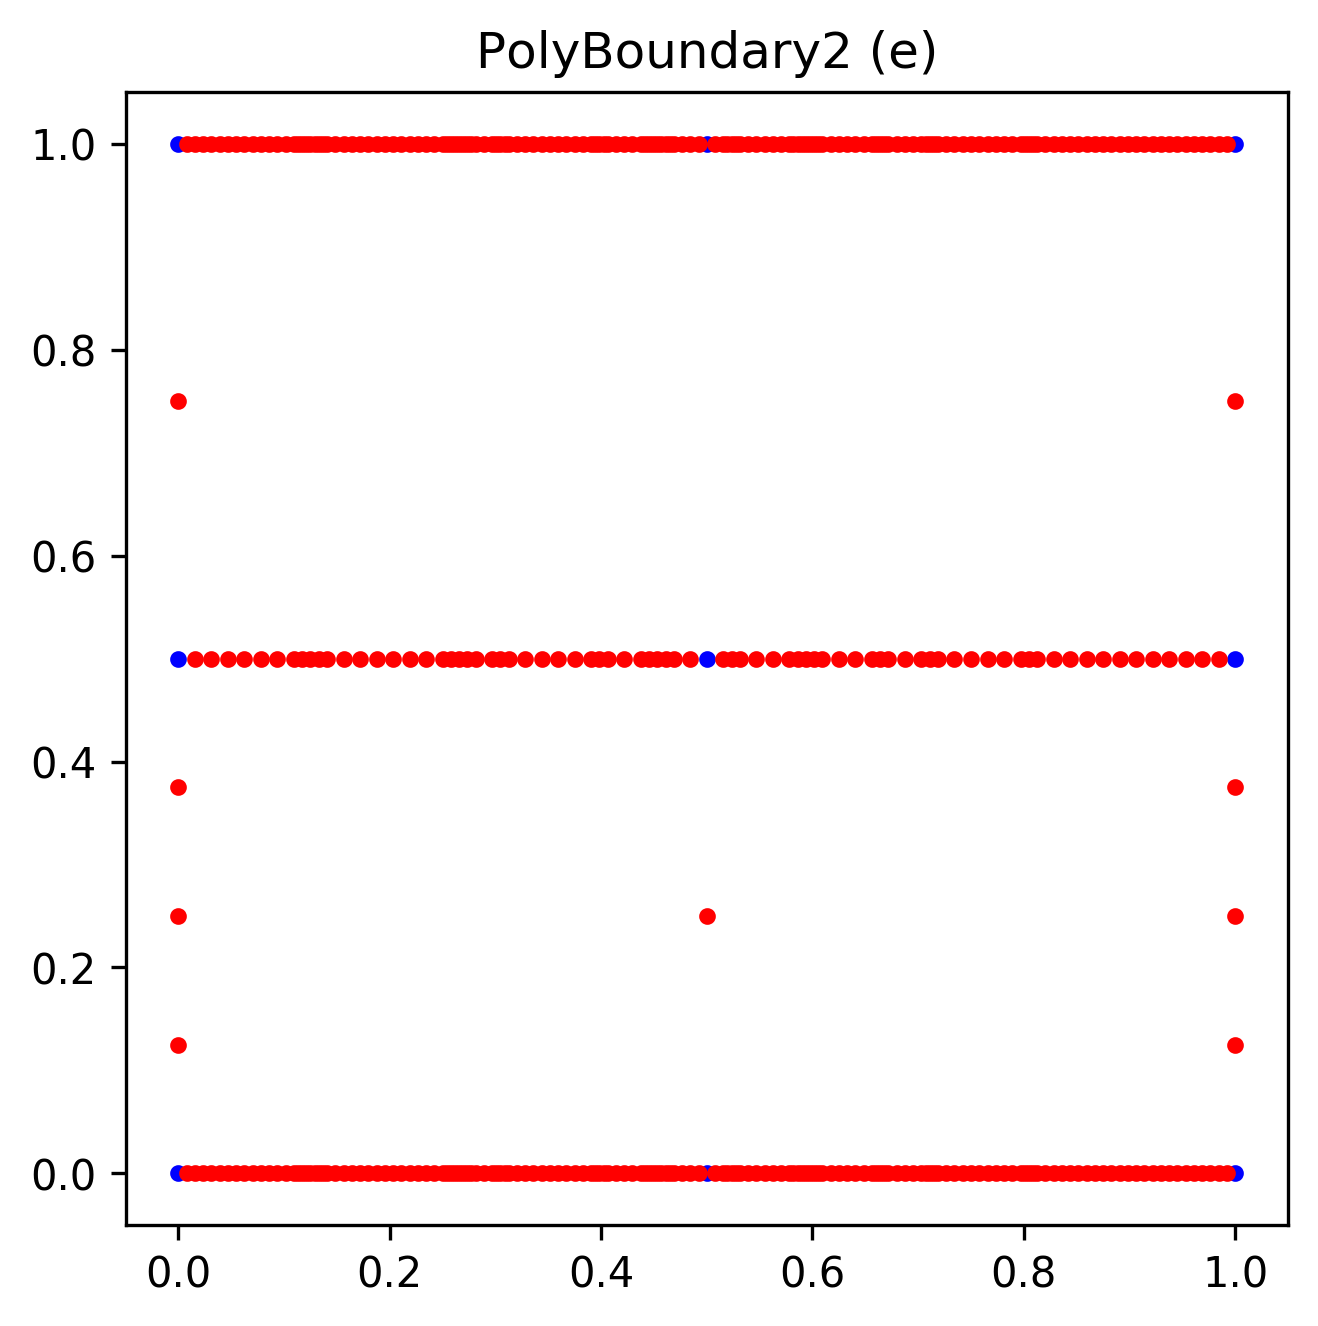

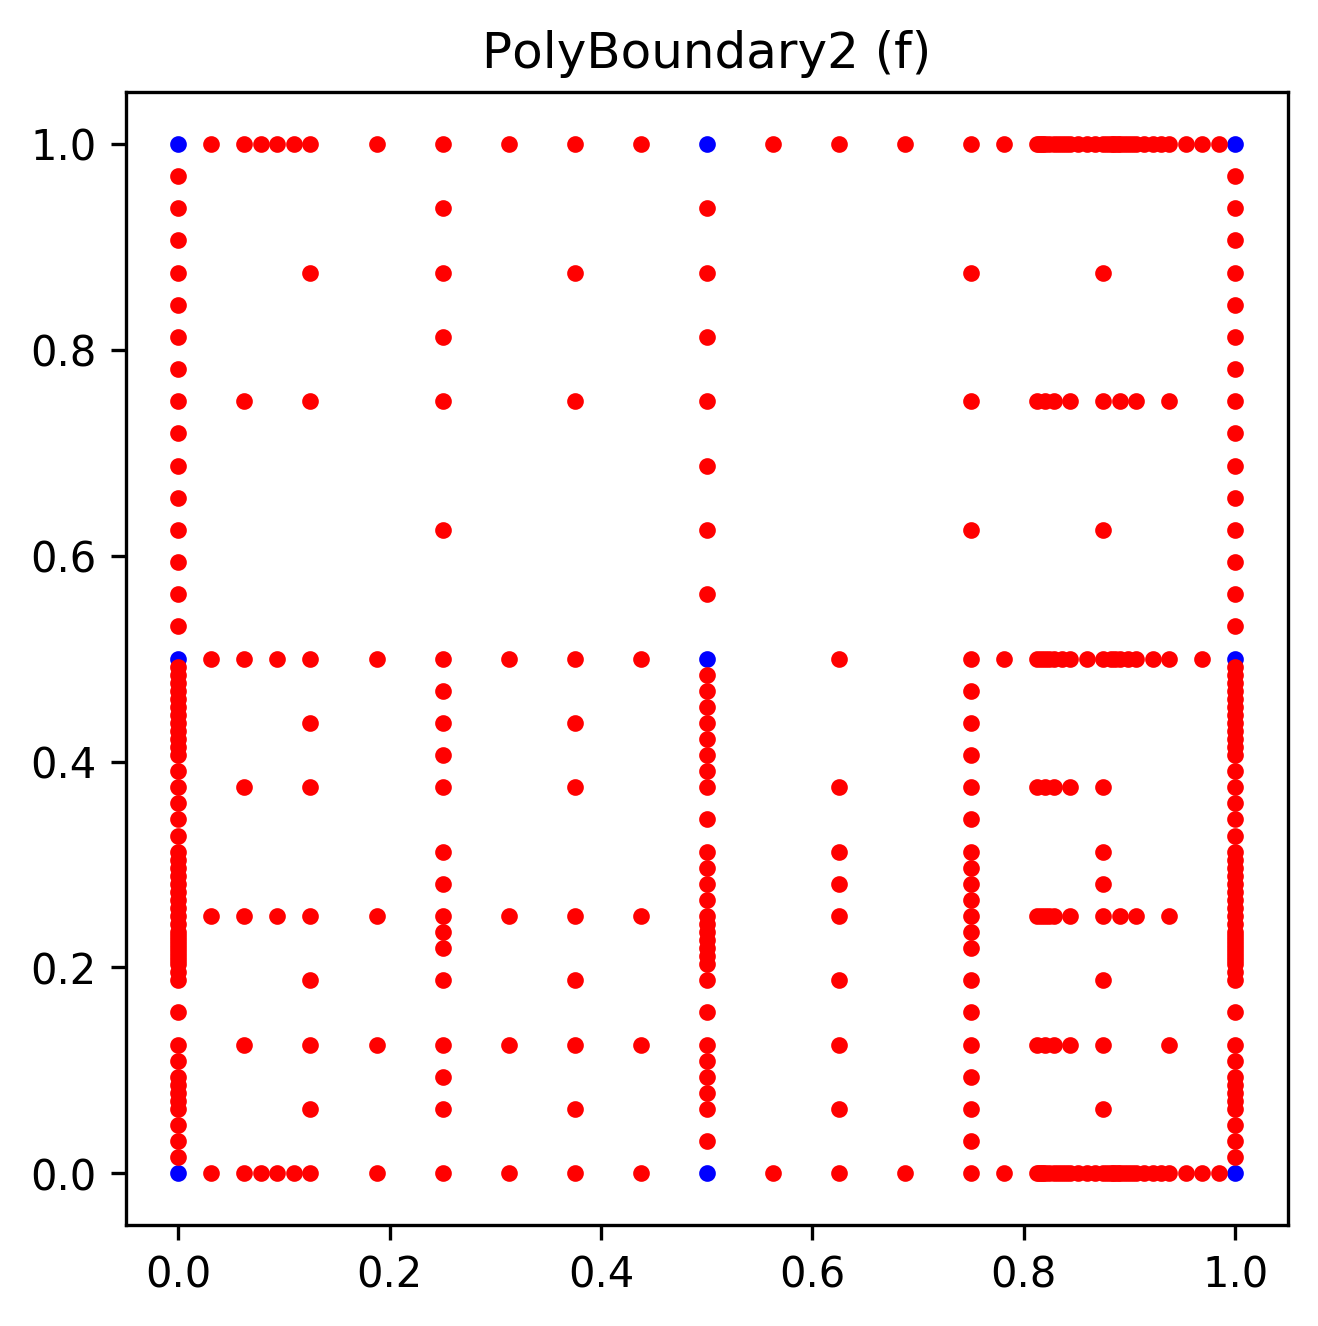

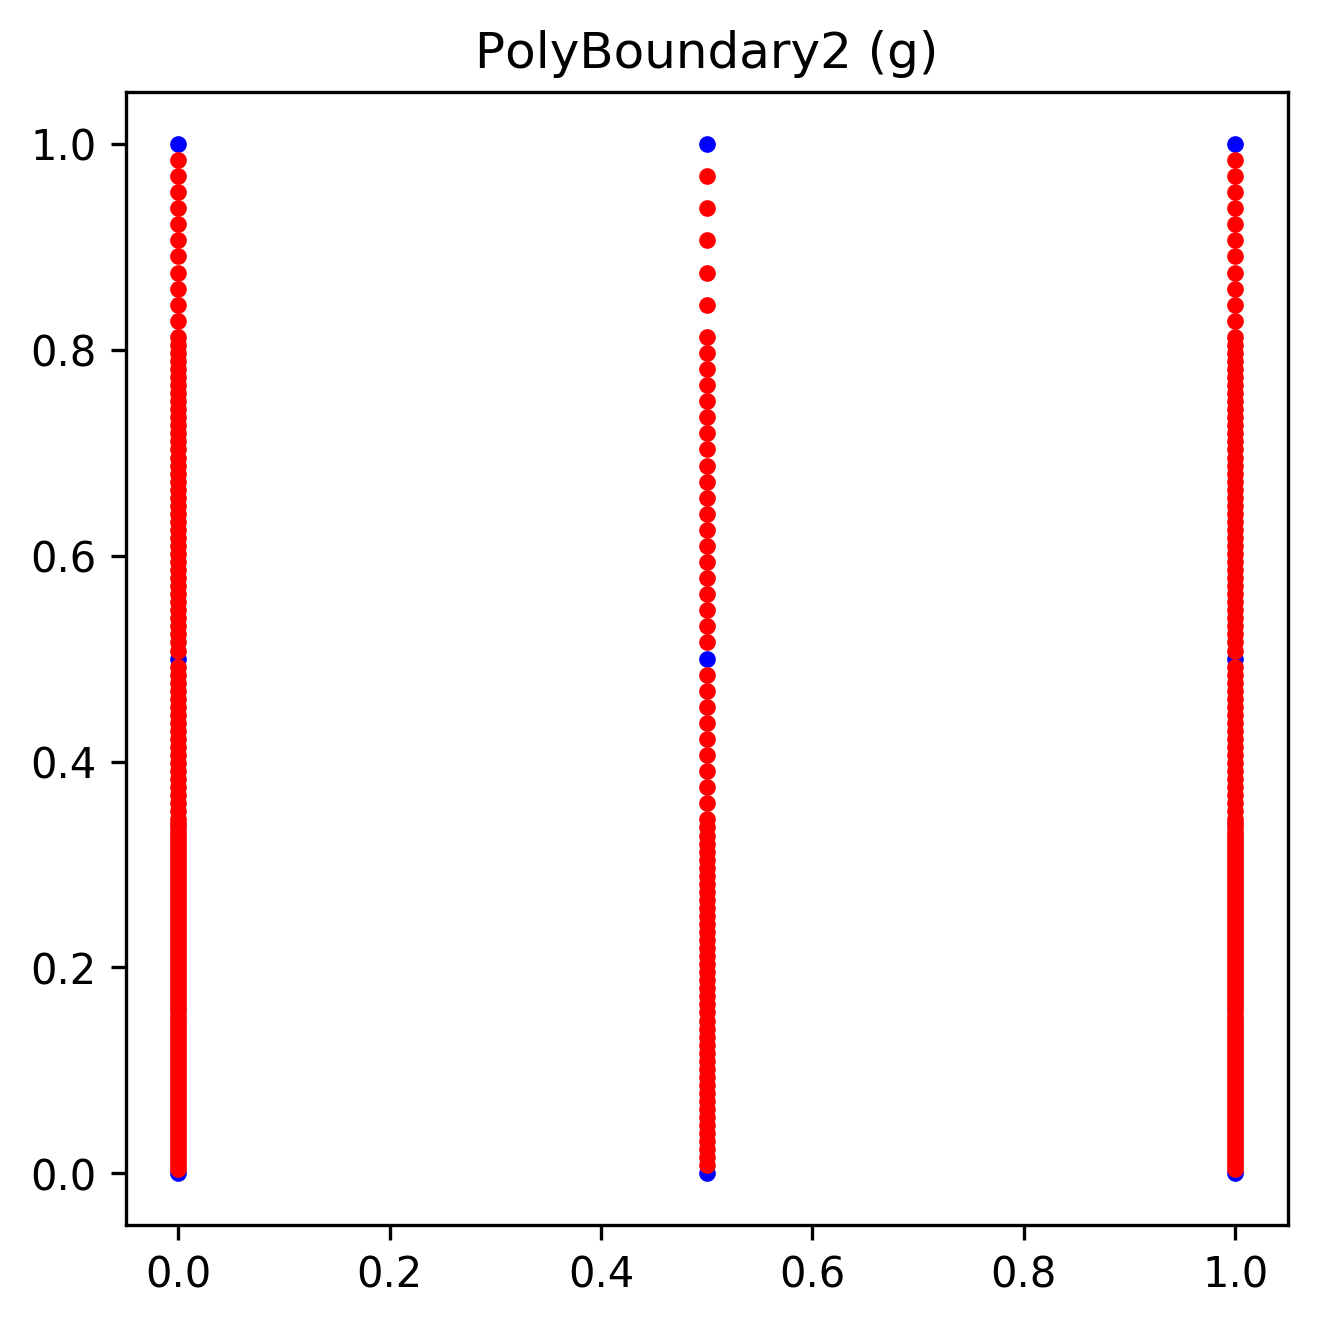

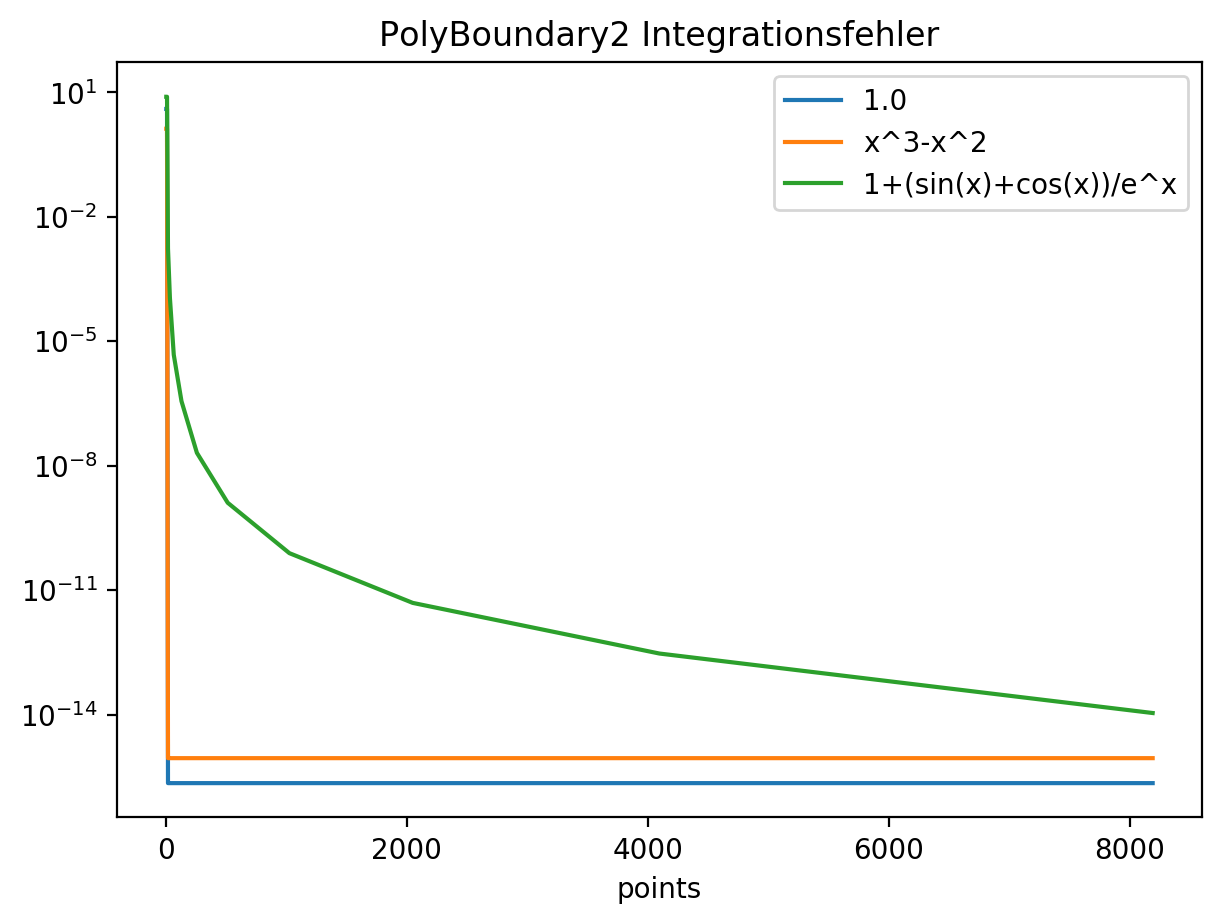

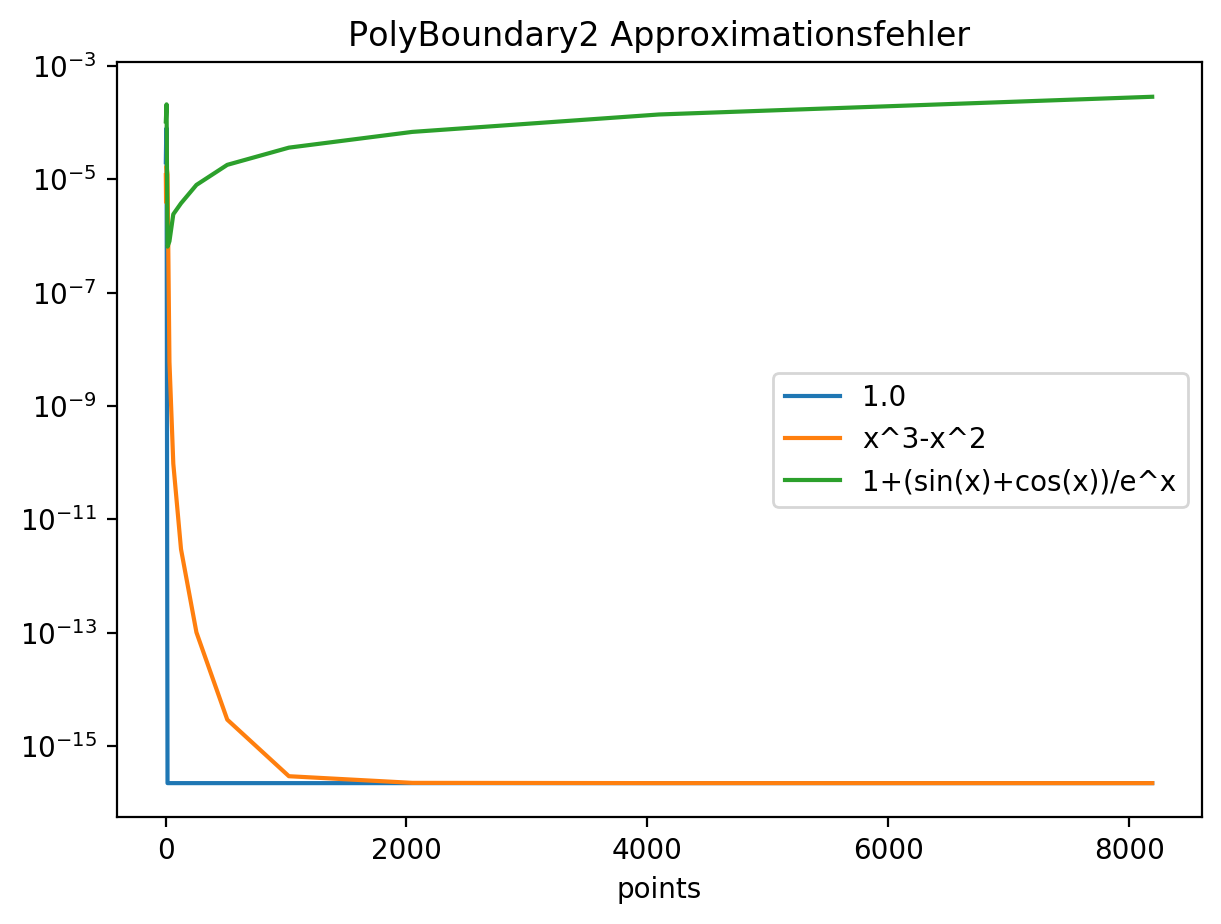

In [21]:
printer('PolyBoundary2')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.000000e+00,4.000000,8.000000,1.600000e+01,3.200000e+01,64.000000,128.000000,256.000000,512.000000,1024.000000,2048.000000,4096,8192,NaN
1,0.000000e+00,0.000000,0.000000,-1.333333e+00,-1.333333e+00,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,-1.333333,54187395364480594135673208832.0000000000000000000,57328390796445548415788515328.0000000000000000000,NaN
2,0.000000e+00,0.000000,0.000000,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0000000000000000000,4.0000000000000000000,NaN
3,0.000000e+00,0.000000,0.000000,7.865309e+00,7.866888e+00,7.866843,7.866843,7.866843,7.866843,7.866843,7.866843,7.8668429924014207089,7.8668429924014207089,NaN
4,4.585796e-07,0.000004,0.000020,1.038894e-05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0693352624382363447,0.1605173466966040297,NaN
5,2.000000e-05,0.000040,0.000080,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000000000000000,0.0000000000000000000,NaN
6,4.895564e-05,0.000400,0.000405,8.624426e-07,6.268050e-07,0.000001,0.000004,0.000008,0.000018,0.000037,0.000067,0.0001379891057298334,0.0002674059307593900,NaN


TypeError: unsupported operand type(s) for -: 'str' and 'int'

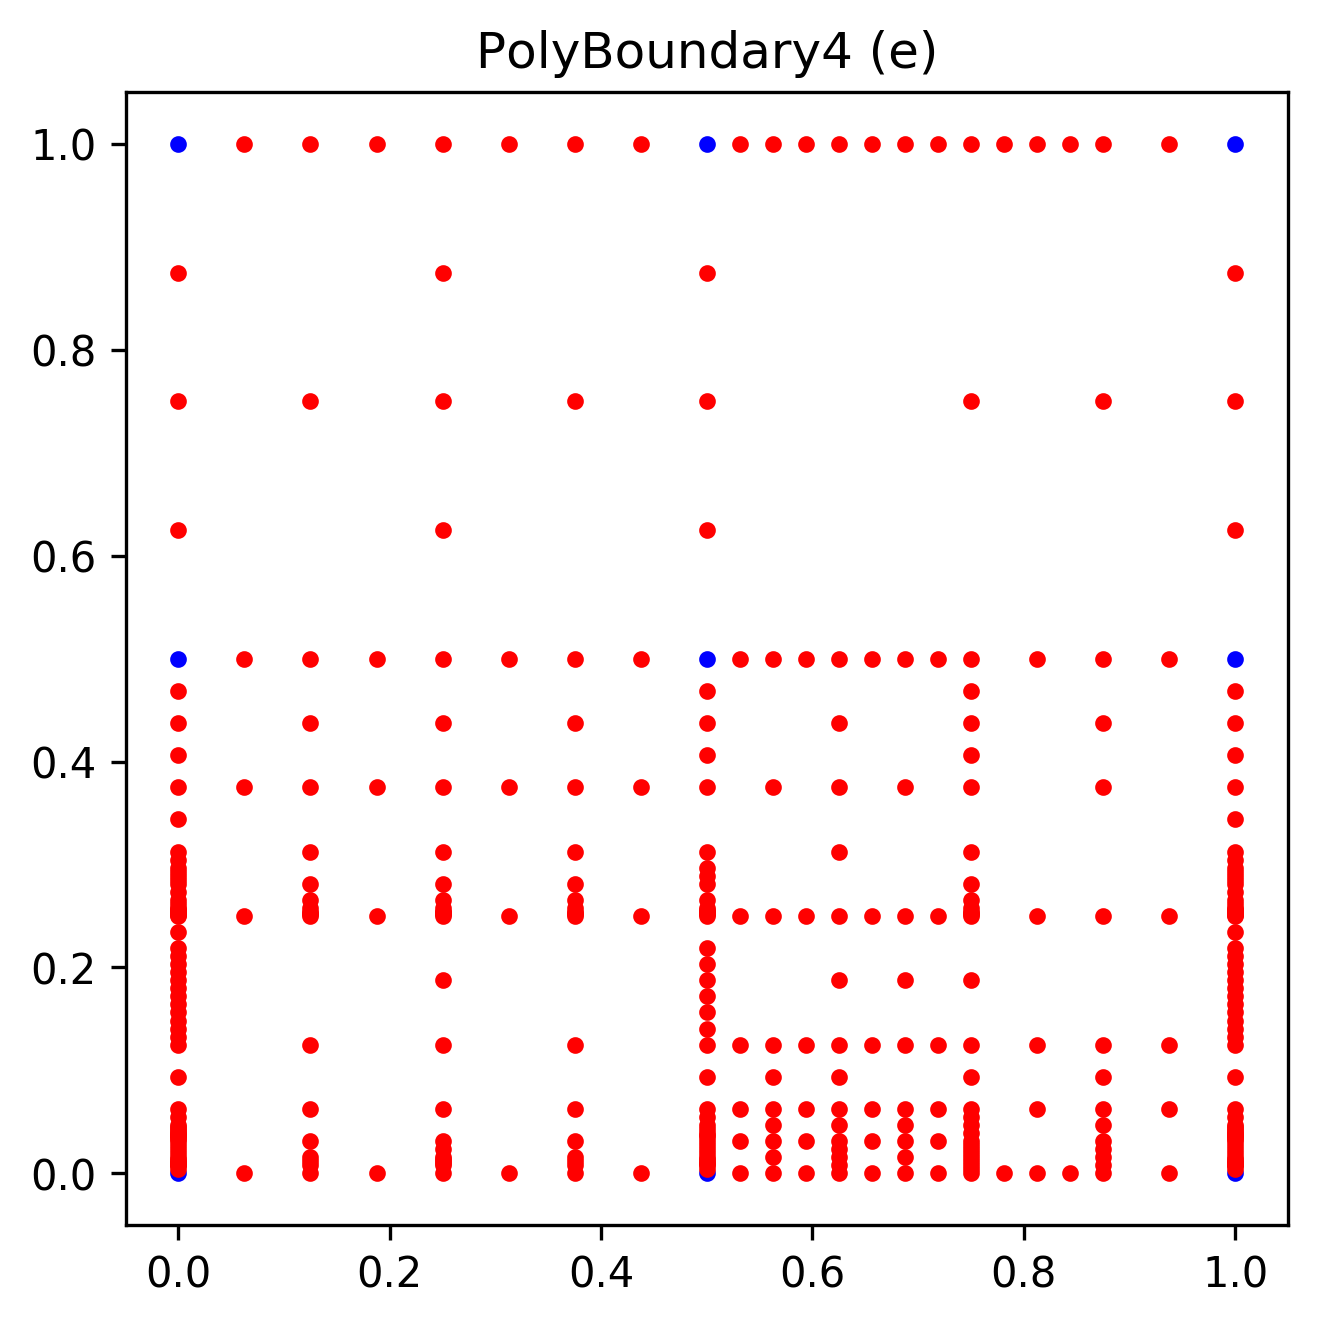

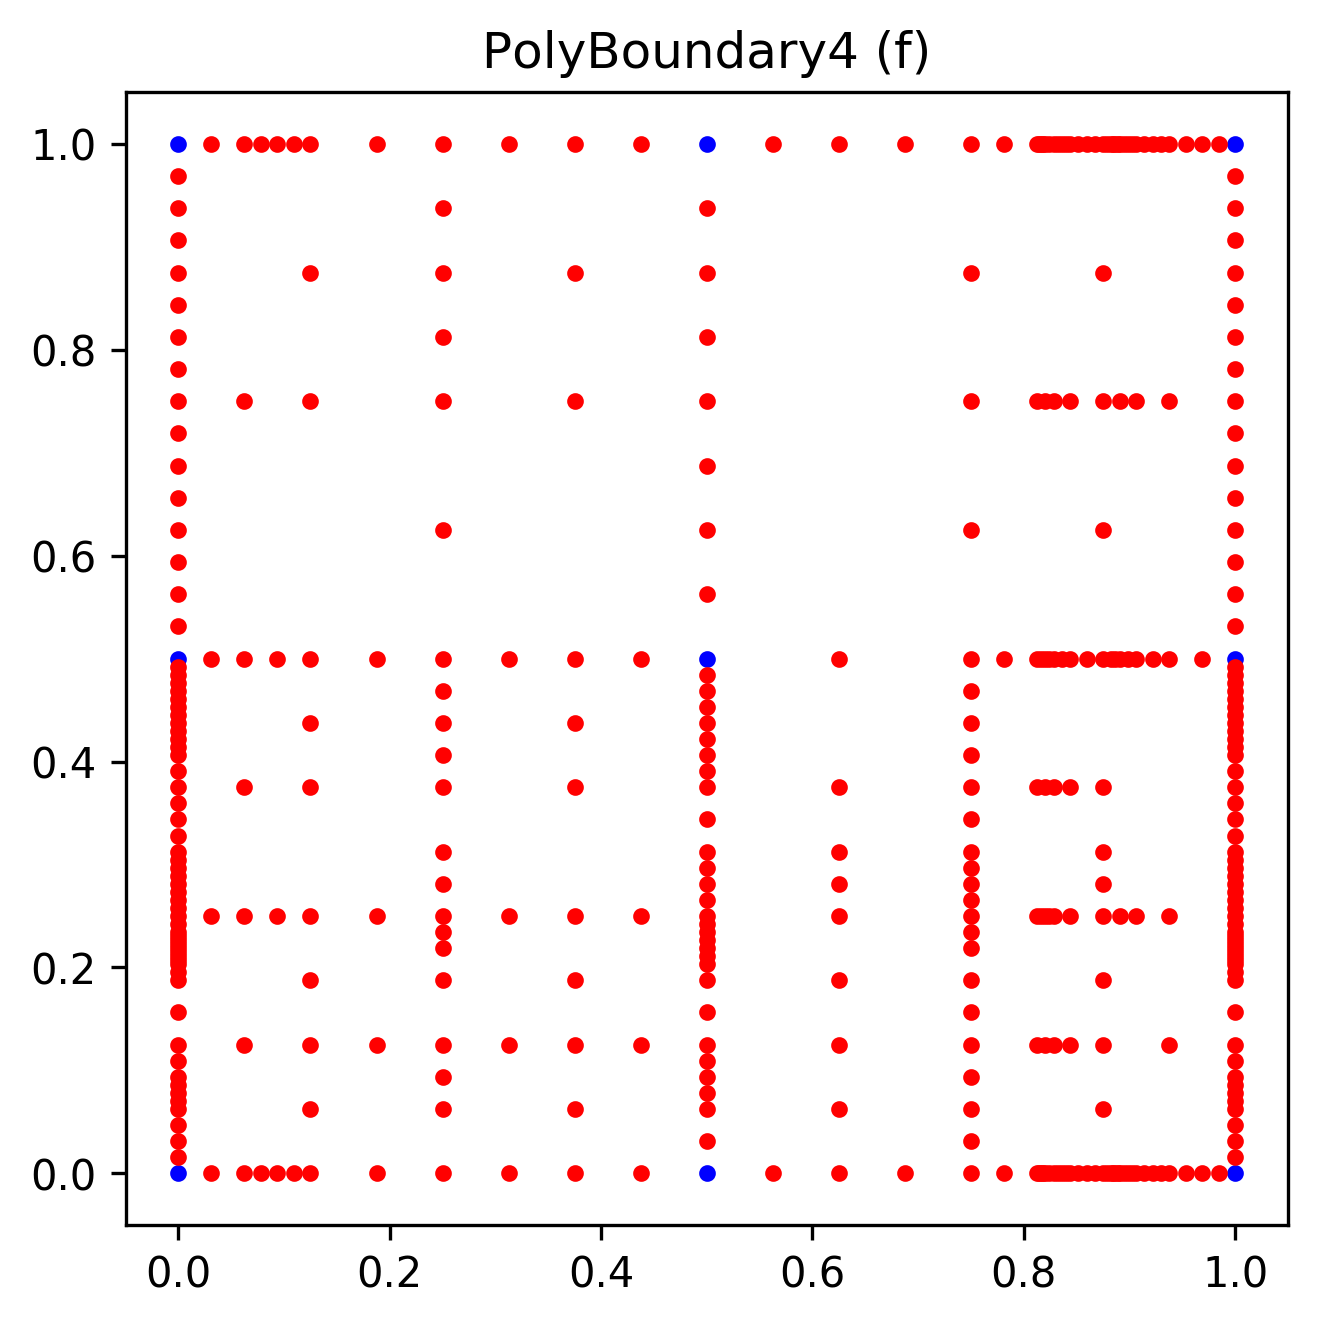

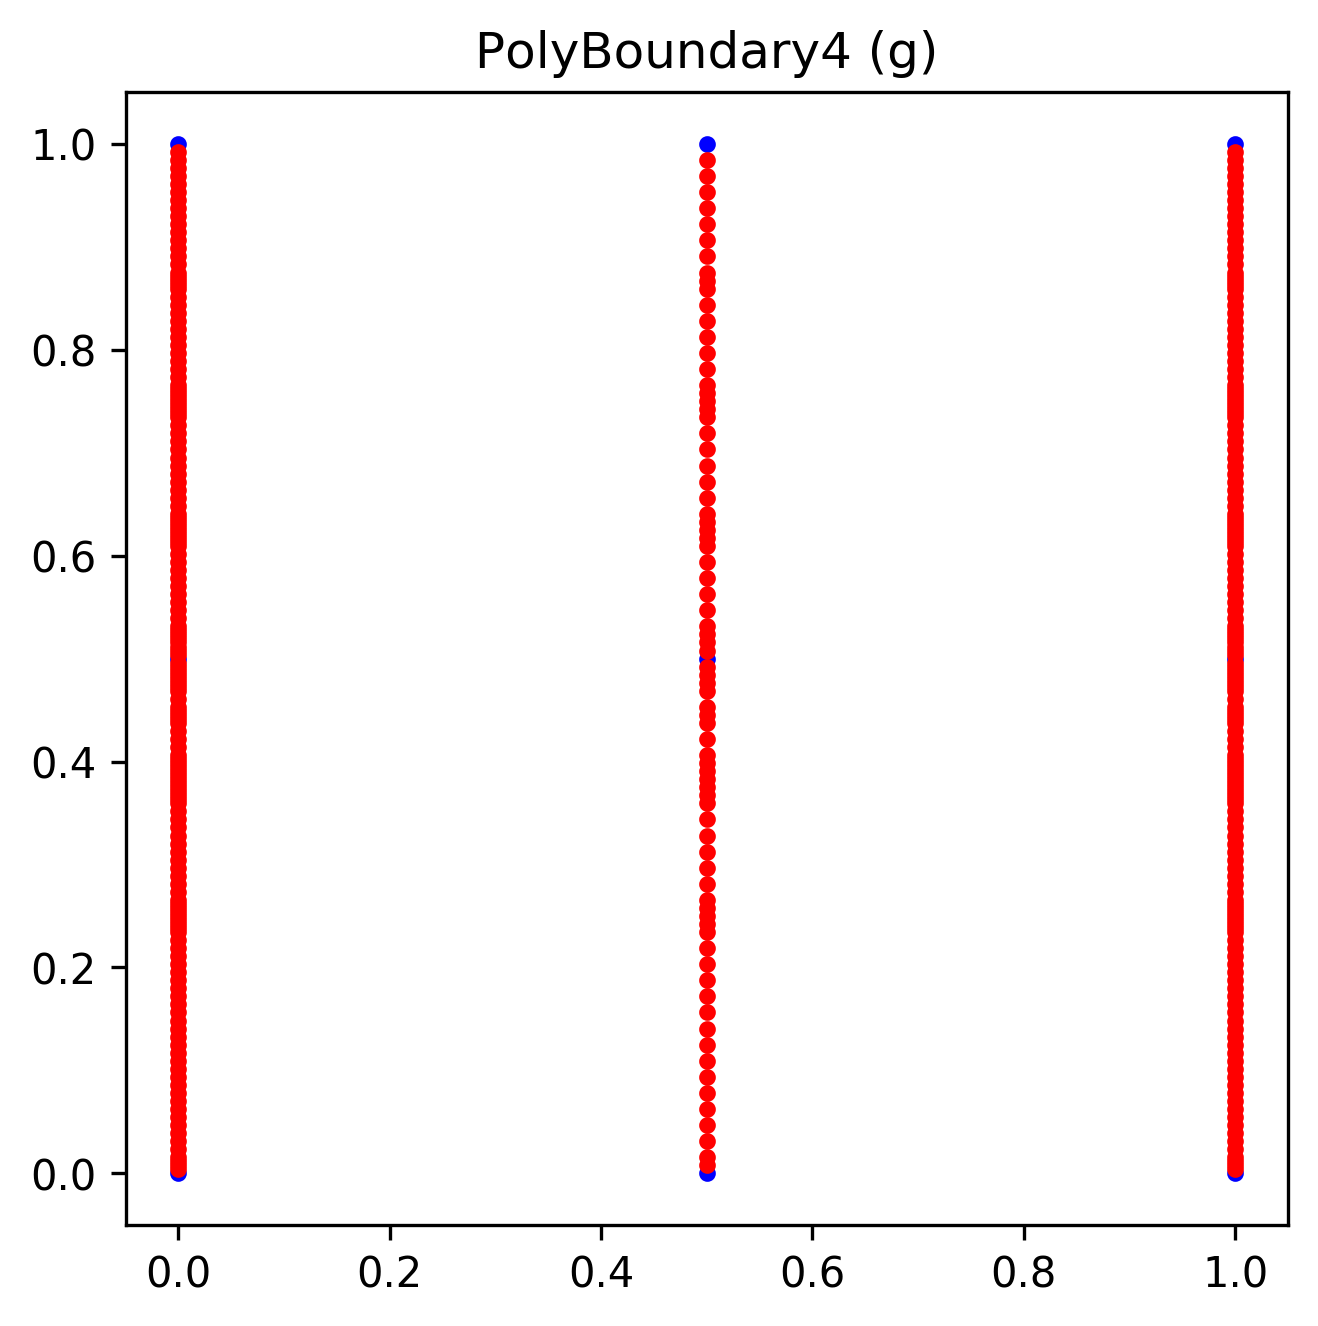

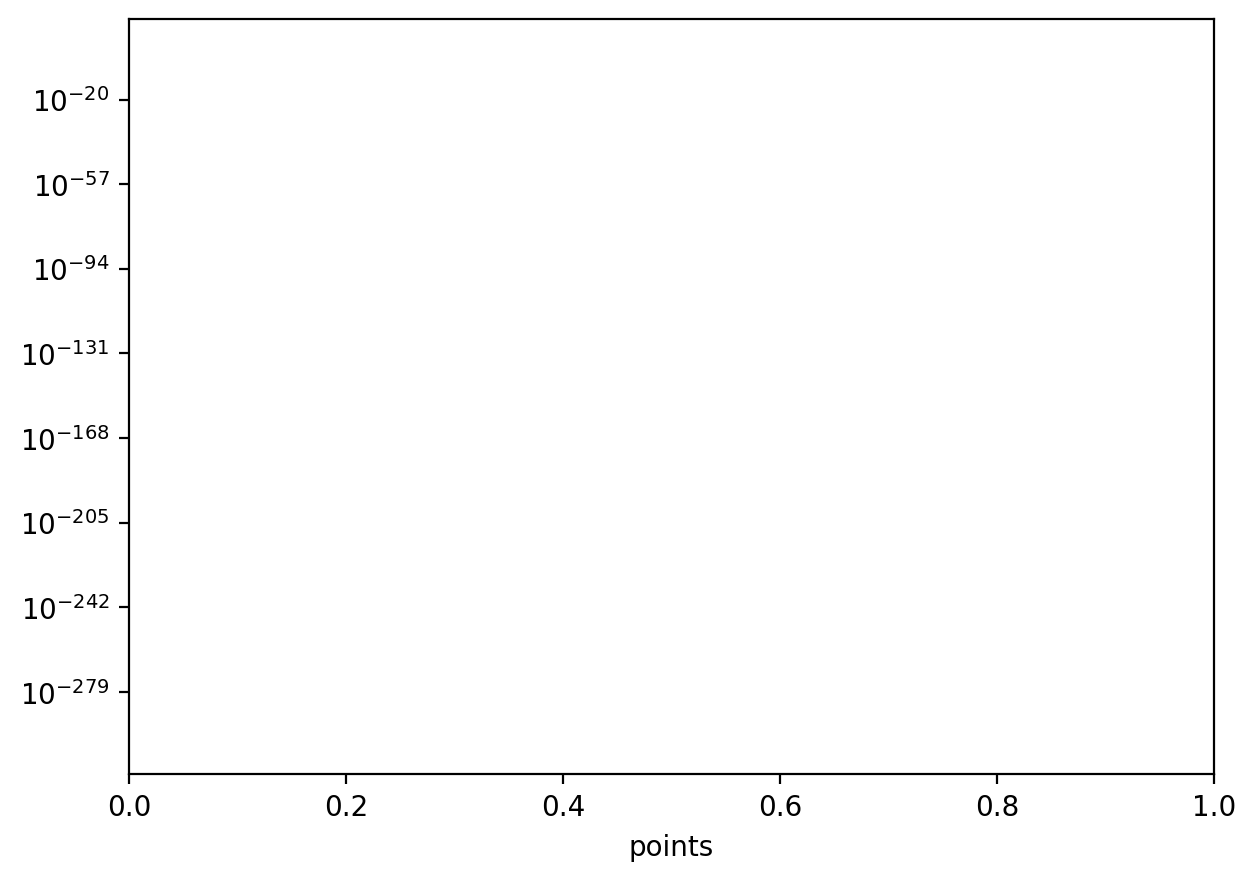

In [22]:
printer('PolyBoundary4')

,0,1,2,3,4,5,6,7,8,9
0,1.000000e+01,2.000000e+01,4.000000e+01,8.000000e+01,1.600000e+02,320.000000,640.000000,1280.000000,2560.000000,NaN
1,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333e+00,-1.333333,-1.333333,-1.333333,-1.333333,NaN
2,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000,4.000000,4.000000,4.000000,NaN
3,7.861380e+00,7.861380e+00,7.866707e+00,7.866879e+00,7.866846e+00,7.866843,7.866843,7.866843,7.866843,NaN
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
6,1.895079e-09,2.306252e-09,1.271070e-11,3.577000e-13,3.300000e-15,0.000000,0.000000,0.000000,0.000000,NaN


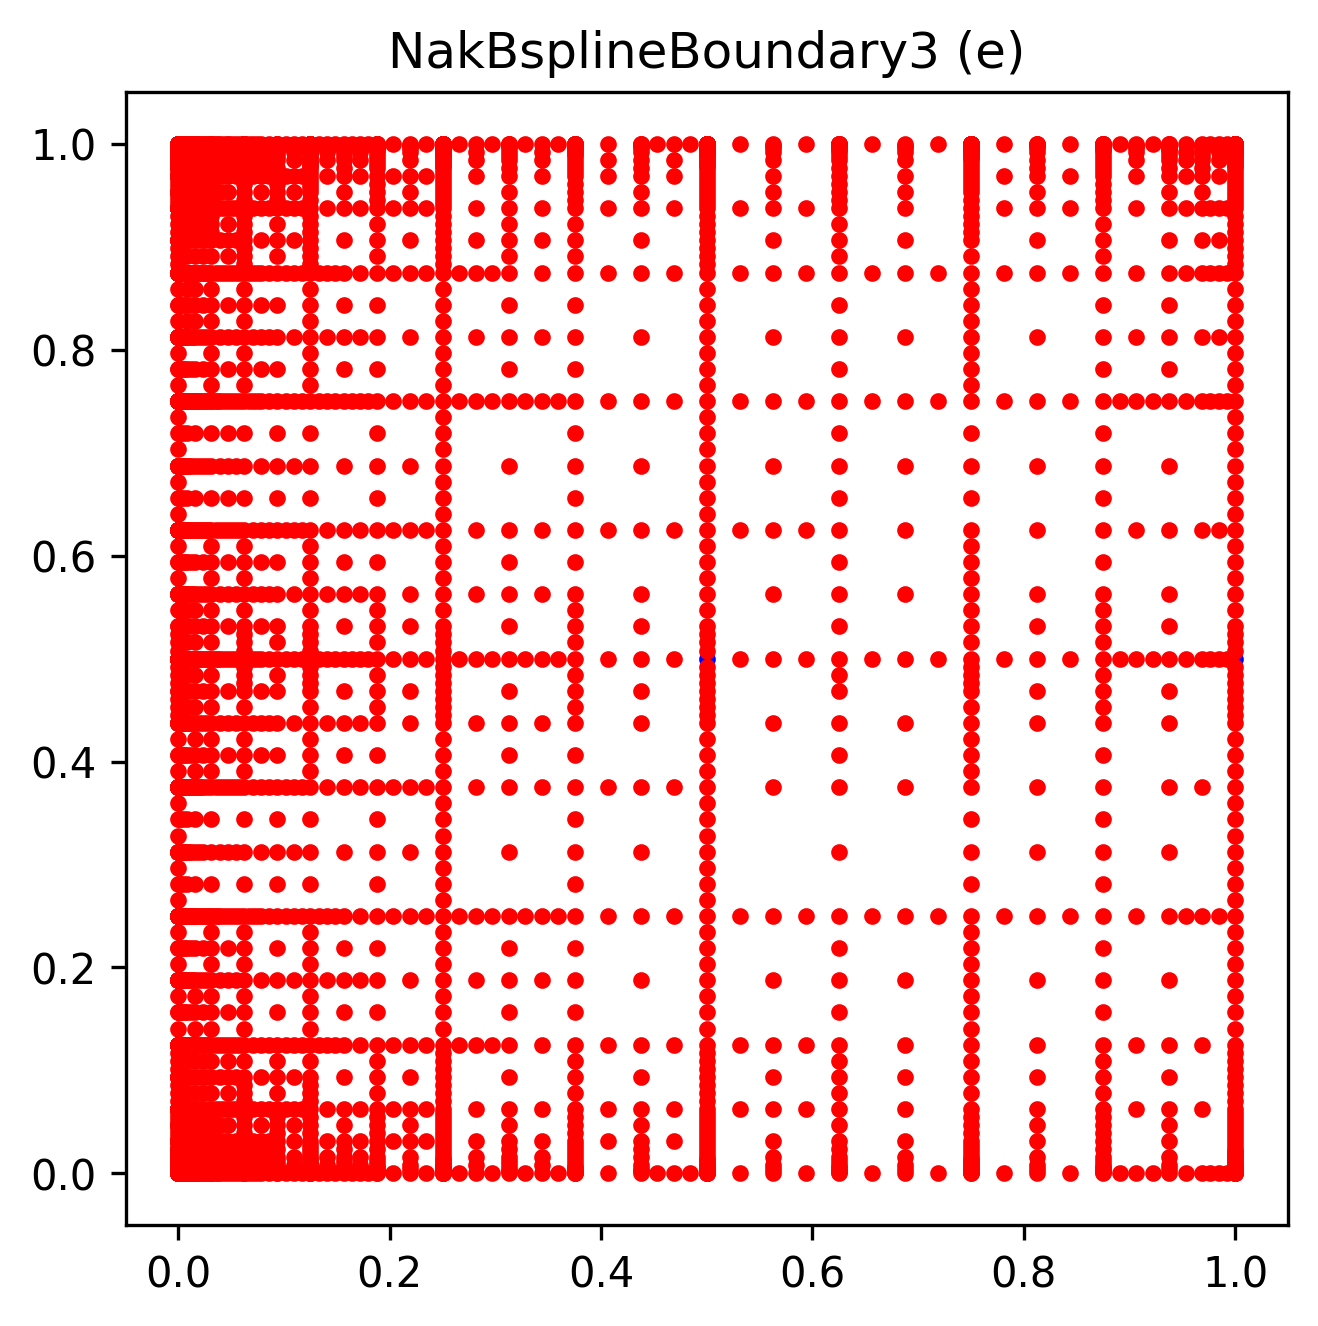

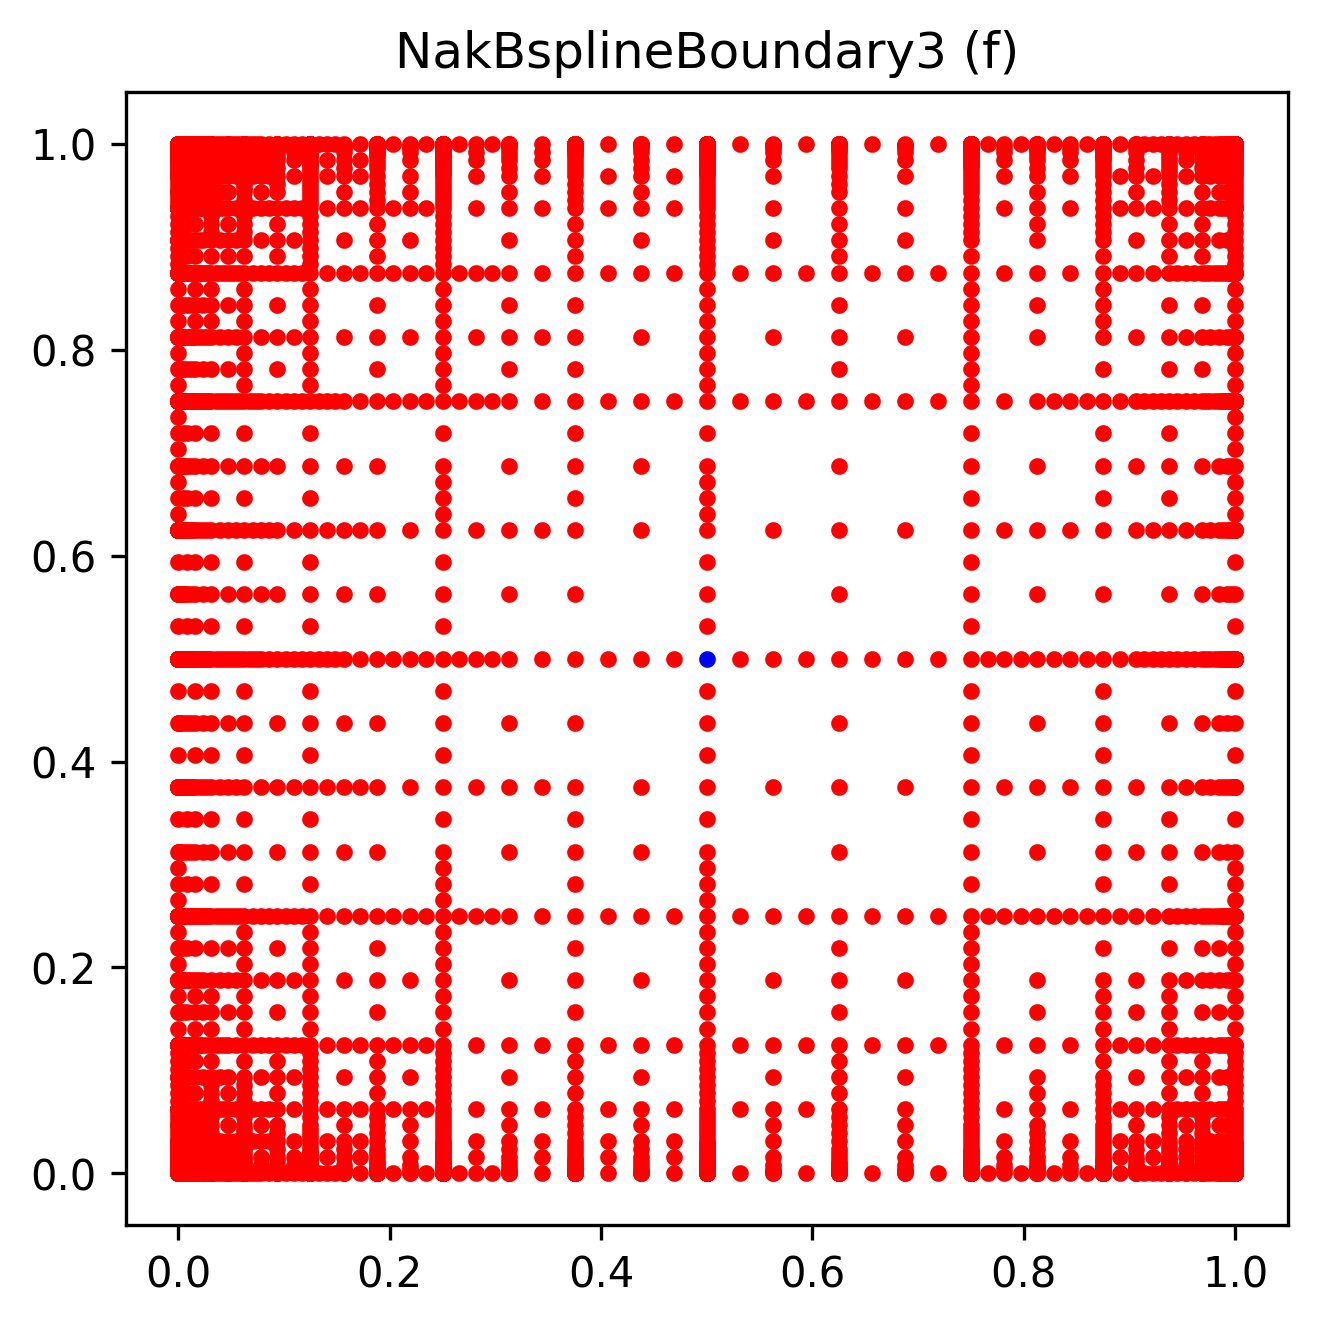

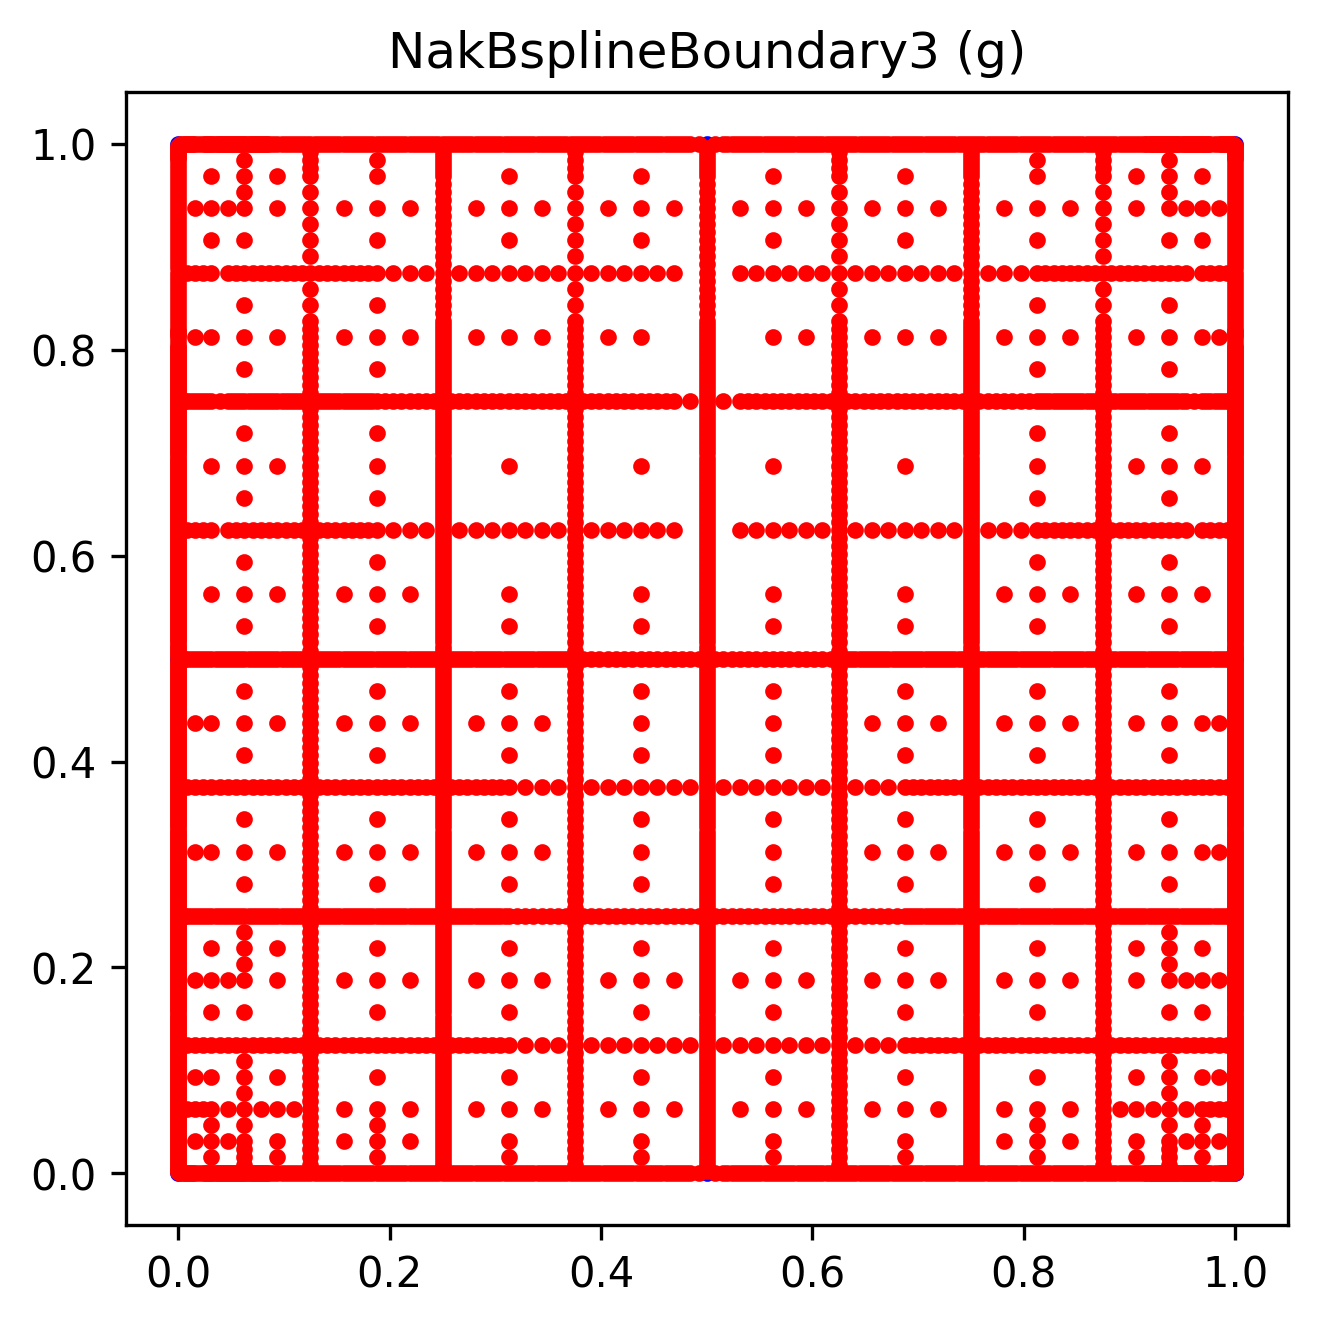

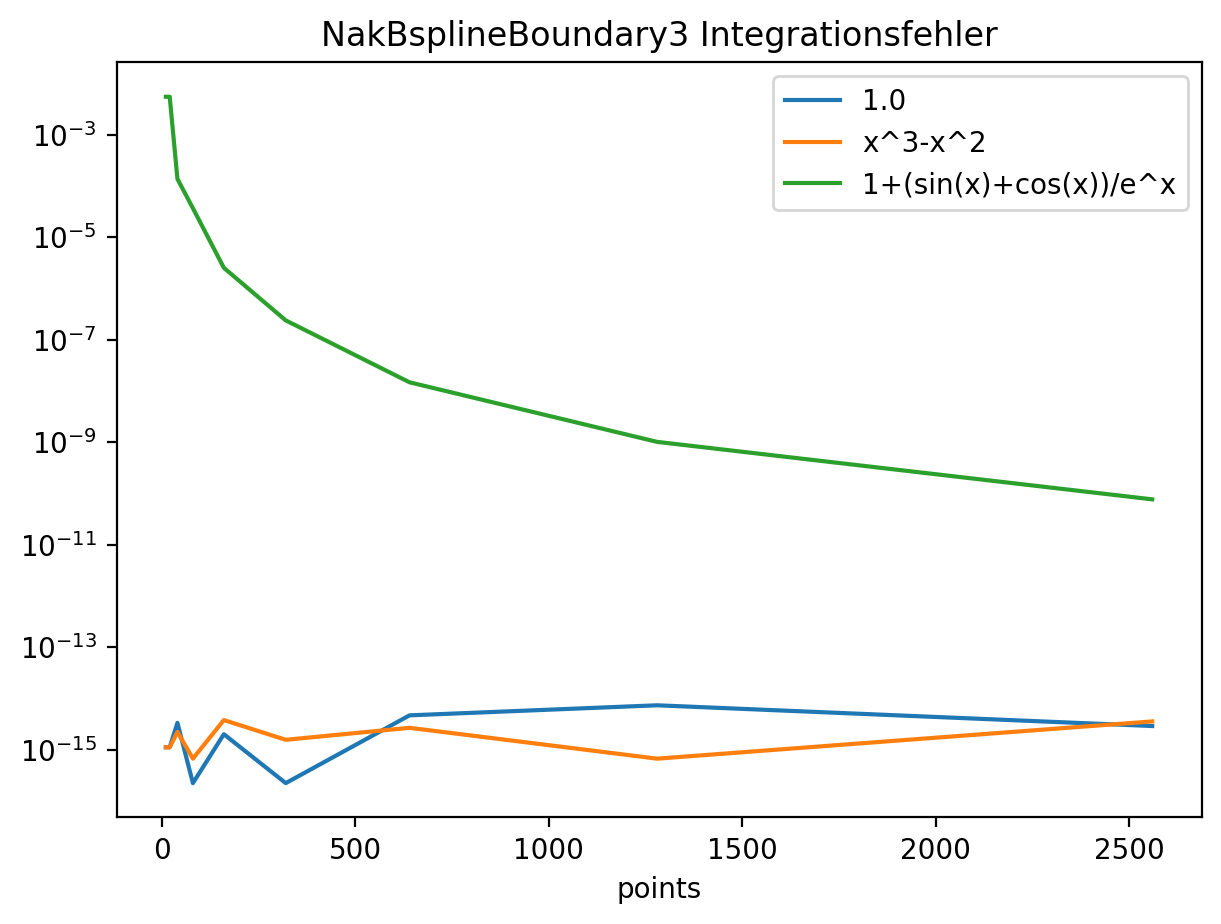

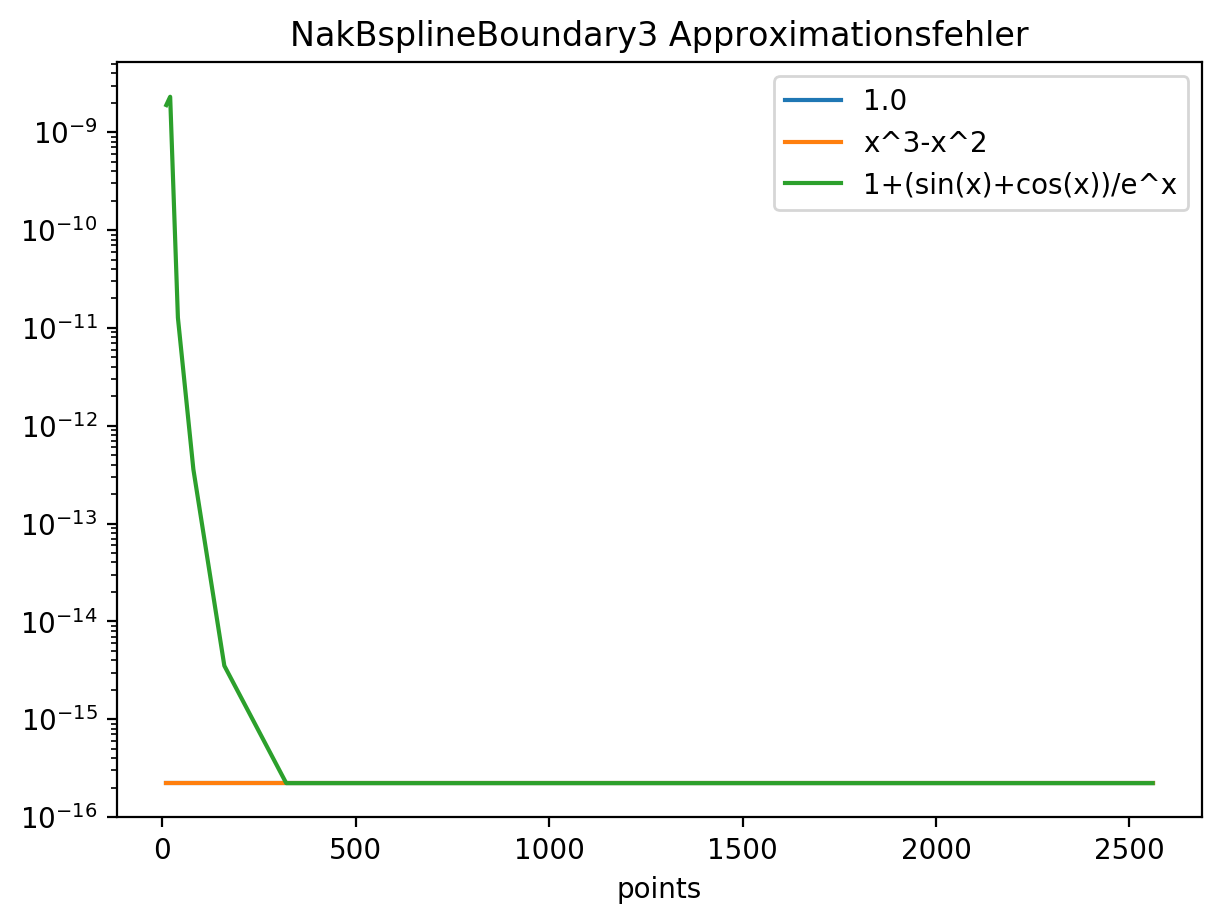

In [29]:
printer('NakBsplineBoundary3')